### **Welcome to this Financial Modeling Notebook, where we will be adopting a fully quantitative approach to allocate a 100 million CHF fund. As a fund manager, our objective is to optimize the allocation of these funds to achieve a balanced and high-performing portfolio. To do this, we will leverage the Black-Litterman Model and Risk Parity Allocation, benchmarking our strategy against the Russell 50 Mega-Cap Index.**

- Our Fund is called: MGS Capital SA (fictional name)

---

## **Our fund operates through two distinct branches**

# 1. Equity Branch

##### Comprising 60% of the overall fund, this segment is an active management strategy that leverages the sophisticated BLACK-Litterman Model applied to a Basket of the top 30 Companies in the `iShares ESG Aware USA ETF` to strive for superior market index performance. This approach embodies our commitment to integrating advanced financial methodologies to optimize investment outcomes.

- The iShares ESG Aware MSCI USA ETF is a fund managed by BlackRock Financial Management, aiming to provide investment results corresponding to the performance of an index composed of U.S. companies with positive Environmental, Social, and Governance (ESG) characteristics, as identified by the index provider. 

# 2.ETF (Exchange Traded Funds) Branch

##### Comprising 40% of the overall fund, this segment aims at diversifying investments across the cutting-edge sectors of technology, namely semiconductors, artificial intelligence, big data, and cybersecurity. By strategically allocating assets into key ETFs and indices, we leverage the growth potential of companies leading the charge in these domains.

<center>

| Ticker | Full Name                      | Sector                |
|:------:|:------------------------------:|:---------------------:|
| SMH    | VanEck Vectors Semiconductor ETF| Technology           |
| SPY    | SPDR S&P 500 ETF Trust         | Multi-Sector         |
| CIBR   | First Trust NASDAQ Cybersecurity ETF | Technology    |
| QQQ    | Invesco QQQ Trust               | Technology           |
| AIQ    | Global X Artificial Intelligence & Technology ETF | Technology |

</center>

- **SMH US Equity**

  - The VanEck Vectors Semiconductor ETF (Ticker: SMH US Equity) is an exchange-traded fund incorporated in the USA. It endeavors to mirror the performance of the MVIS US Listed Semiconductor 25 Index, which traces the top publicly listed semiconductor companies in the United States. This ETF serves as a conduit for investors to delve into the semiconductor sector, a linchpin for technological evolution across numerous industries.

<br>

- **SPY US Equity**

  - The SPDR S&P 500 ETF Trust (Ticker: SPY US Equity) is a fund domiciled in the United States striving to reflect the performance of the S&P 500 Index. It provides a broad exposure to large-cap U.S. stocks, encapsulating a multi-sector array of industries. This ETF is a cornerstone for investors aiming to align their portfolios with the broader U.S. equity market, promoting diversification and a balanced risk profile.

<br>

- **CIBR US Equity**

  - The First Trust NASDAQ Cybersecurity ETF (Ticker: CIBR US Equity) is an exchange-traded fund based in the USA designed to track the performance of companies engaged in the cybersecurity sector as represented by the Nasdaq CTA Cybersecurity Index. It encompasses firms that are chiefly involved in the development and management of security protocols ensuring the integrity and safety of online and offline operations.

<br>

- **QQQ US Equity**

  - The Invesco QQQ Trust (Ticker: QQQ US Equity) is an exchange-traded fund domiciled in the United States, aspiring to track the performance of the Nasdaq-100 Index. This index includes 100 of the largest non-financial companies listed on the Nasdaq stock exchange, offering investors a broad spectrum of the technology domain alongside other innovative sectors.

<br>

- **AIQ US Equity**

  - The Global X Artificial Intelligence & Technology ETF (Ticker: AIQ US Equity) is an exchange-traded fund incorporated in the USA. It aims to emulate the performance of the Indxx Artificial Intelligence and Big Data Index, which tracks companies in developed markets leveraging artificial intelligence technology in their products and services. This ETF enables investors to capitalize on the burgeoning AI and data analytics segment.

<br>

> ### **With the Russell 50 Mega-Cap as our benchmark, we remain steadfast in our mission to blend the youthful vigor and long-term investment aspirations with the structured world of equity and ETF investments. Through MGS Capital SA, we envision nurturing a generation of financially literate and independent individuals, capable of navigating the intricacies of the investment realm while contributing positively to economic growth and personal wealth accumulation.**

# **Equity Branch - Allocations**

The objective of this branch is to explore a structured approach to portfolio optimization by initially conducting a pairwise analysis of the 30 ESG stocks in the portfolio based on historical returns, followed by the implementation of the Black-Litterman Model. This dual-stage approach aims to uncover promising stock pairs and utilize market views to derive systematic an optimized portfolio construction.

## Pairwise Stock Analysis

1. **Identifying Unique Pairs of Stocks:**
- The initial phase involved generating all unique pairs of stocks from a dataset of historical returns, facilitating pairwise comparisons.

2. **Calculating Differences in Returns:**
- Differences in returns between each pair of stocks were calculated to analyze the relative performance of stock pairs.

3. **Regression Analysis:**
- Regression analyses were performed on the differences in returns against a set of market factors using the Ordinary Least Squares (OLS) method.

4. **Extracting Key Metrics:**
- Key metrics including monthly alpha, variance of residuals, and adjusted R-squared values were extracted from each regression.

5. **Organizing and Sorting Results:**
- The metrics were arranged and sorted according to the R-squared value to prioritize stock pairs where the difference in returns was the most pronounced.

6. **Filtering for Positive Monthly Alpha:**
- The results were further filtered to retain only stock pairs exhibiting a positive monthly alpha, indicating potential for consistent positive returns over the others.

## Black-Litterman Model Implementation and Portfolio Optimization

1. **Black-Litterman Model Implementation:**
- The Black-Litterman model was implemented using these values alongside other market parameters to compute expected returns and a covariance matrix.

2. **Portfolio Optimization Framework:**
- An objective function was defined to measure the squared difference between portfolio weights and Black-Litterman and the current weights based on the market cap.

3. **Optimization Routine:**
- An optimization routine was launched to minimize the objective function while adhering to the constraints on the sum of weights must equal to 1.
-  This setup enabled the adjustment or "tweaking" of the weights allocated to certain stocks, specifically those exhibiting potential for enhanced relative performance compared to others. Through this mechanism, the aim is to enhance the overall portfolio performance by optimizing the distribution of capital among various stocks based on their expected relative performance.


- This structured approach aids in deriving a portfolio that balances the insights from the Black-Litterman model

# **Importing all the libraries**

In [1]:
import subprocess

# list of required packages
required_packages = [
    'numpy', 'pandas', 'matplotlib', 'seaborn', 'pyriskmgmt',
    'statsmodels', 'scipy', 'joblib', 'prettytable']

# Function to check if a package is installed
def is_package_installed(package):
    try:
        __import__(package)
        return True
    except ImportError:
        return False

# Iterate through the list of required packages
for package in required_packages:
    # If the package is not installed, install it using pip
    if not is_package_installed(package):
        subprocess.run(['pip', 'install', package])

In [2]:
# importing the warnings library
import warnings ; warnings.filterwarnings("ignore")
# importing the numpy library as np for numerical operations
import numpy as np 
# importing the pandas library as pd for data manipulation and analysis
import pandas as pd  
# importing the pyplot module from matplotlib as plt for plotting data
import matplotlib.pyplot as plt 
# importing the seaborn library as sns for statistical data visualization
import seaborn as sns  
# setting the seaborn style to "whitegrid" for subsequent plots
sns.set_style("darkgrid")  
# importing YieldCurve from pyriskmgmt.fixed_income_models for fixed income analysis
from pyriskmgmt.fixed_income_models import YieldCurve 
# importing itertools for pair-wise computation
import itertools
# importing the module to perform the regression analysis
import statsmodels.api as sm
# importing the minimize function for optimization
from scipy.optimize import minimize
# importing the norm function for VaR and Es Calculations
from scipy.stats import norm
# importing the Parallel, delayed, in order to speed up the Monte Carlo simulation of the Var - Es
from joblib import Parallel, delayed
# importing PrettyTable for clear output 
from prettytable import PrettyTable

# **Our Benchmark**

## The Russell 50 Mega-Cap Index

- The "Russell 50" is a subset of the largest companies in the Russell 3000E Index, which is itself a broad-market index representing approximately 98% of the U.S. equity market. 
- The Russell 50 Index, often dubbed the "mega-cap" index, is designed to reflect the performance of the largest companies in the U.S. equity universe.
- This Index is cap-weighted, also known as market capitalization-weighted. In such an index, the weight of each constituent (company) is determined by its market capitalization, which is calculated by multiplying its stock price by the number of shares outstanding.

![](RU_INFO.png)

![](RU_INFO2.png)

#### **Recognizing the increasing importance and demand for sustainable investments, we have incorporated an ESG (Environmental, Social, and Governance) dimension into our selection. We have done this by prioritizing the top 30 stocks by market capitalization in the iShares ESG Aware MSCI index. This ensures that our investors not only benefit from the technological prowess of these companies but also align their investments with ESG values, catering to a demographic that is deeply conscious of global sustainability challenges."**

### These are the company we selected for our Equity Branch

In [3]:
# importing the 'DATA.xlsx' file and reading the 'WEIGHT' sheet into a DataFrame
russell = pd.read_excel("DATA.xlsx", sheet_name="Weights")

# setting the 'Ticker' column as the index for the DataFrame
russell.set_index("Ticker", inplace= True)

# printing the companies selected for our portfolio
print(russell.index.values)

['AAPL' 'MSFT' 'GOOG' 'GOOGL' 'AMZN' 'NVDA' 'META' 'BRK/B' 'TSLA' 'LLY'
 'UNH' 'V' 'XOM' 'JPM' 'JNJ' 'MA' 'AVGO' 'PG' 'CVX' 'HD' 'ORCL' 'MRK'
 'ABBV' 'ADBE' 'COST' 'KO' 'PEP' 'CSCO' 'BAC' 'ACN']


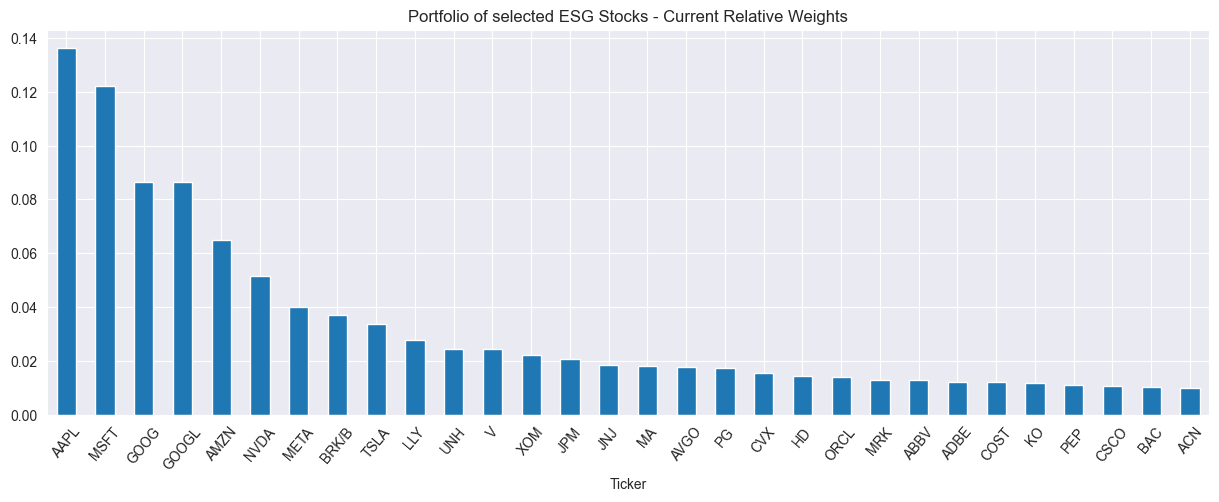

In [4]:
# plotting a bar chart of the 'Weight' column with specified size and title
russell["Weight"].plot(kind="bar", figsize=(15,5), title = "Portfolio of selected ESG Stocks - Current Relative Weights")

# rotating the x-axis labels by 50 degrees for better visibility
plt.xticks(rotation=50)

# displaying the plot
plt.show()

## Monthly Returns for all the stock in the Our Equity Portfolio

In [5]:
# reading the Excel file named "DATA.xlsx" from the "STOCKS" sheet and storing it in the 'returns' DataFrame
returns = pd.read_excel("DATA.xlsx", sheet_name="Stocks")

# setting the "Date" column as the index for the 'returns' DataFrame
returns.set_index("Date", inplace=True)

# calculating the percentage change of the stock returns and dropping any NaN values that arise
returns = returns.pct_change().dropna()

# displaying the first rows of the filtered 'returns' DataFrame
returns.head()

,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,META,BRK/B,TSLA,LLY,...,ORCL,MRK,ABBV,ADBE,COST,KO,PEP,CSCO,BAC,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-30,0.072693,0.013366,0.063097,0.068763,0.027685,0.028695,0.058883,-0.003958,-0.000577,0.012860,...,0.027886,-0.011954,0.043203,0.046199,0.002939,0.002942,0.028408,0.065340,0.000000,0.015333
2014-06-30,0.027691,0.018564,0.027473,0.022776,0.039096,-0.024211,0.063033,-0.013869,0.155415,0.038590,...,-0.035459,-0.000172,0.038837,0.121165,-0.007413,0.035444,0.011434,0.009342,0.015192,-0.007489
2014-07-31,0.028709,0.035012,-0.006380,-0.008757,-0.036271,-0.056095,0.079655,-0.008929,-0.069814,-0.017854,...,-0.003454,-0.019187,-0.072644,-0.042980,0.020667,-0.072474,-0.013880,0.015292,-0.007807,-0.019297
2014-08-29,0.072176,0.052595,0.000000,0.004831,0.083195,0.111429,0.029869,0.094236,0.207790,0.040943,...,0.028225,0.059392,0.056171,0.038267,0.030117,0.061848,0.049830,-0.009512,0.055082,0.022452
2014-09-30,-0.017054,0.020471,0.010069,0.010372,-0.048962,-0.051414,0.056402,0.006485,-0.100184,0.020296,...,-0.078257,-0.013808,0.044863,-0.037691,0.035018,0.022531,0.006487,0.007203,0.059664,0.003208


In [6]:
# displaying the last rows of the 'returns' DataFrame
returns.tail()

,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,META,BRK/B,TSLA,LLY,...,ORCL,MRK,ABBV,ADBE,COST,KO,PEP,CSCO,BAC,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-30,0.094330,0.036999,-0.019454,-0.025800,0.081108,0.118095,0.084089,0.062041,0.283627,0.092023,...,0.124127,0.045105,-0.023413,0.170421,0.052428,0.009387,0.015739,0.041675,0.032386,0.008695
2023-07-31,0.012785,-0.013567,0.100355,0.108772,0.025468,0.104652,0.110182,0.032141,0.021622,-0.030769,...,-0.015618,-0.075743,0.110220,0.116935,0.041402,0.028396,0.012094,0.005798,0.115371,0.025180
2023-08-31,-0.043675,-0.024291,0.031853,0.025995,0.032391,0.056196,-0.071281,0.023412,-0.034962,0.219228,...,0.026956,0.021847,-0.017516,0.024113,-0.020315,-0.033909,-0.050891,0.102037,-0.104062,0.023455
2023-09-29,-0.088678,-0.036643,-0.040044,-0.038995,-0.078907,-0.118651,0.014600,-0.027485,-0.030456,-0.030801,...,-0.120193,-0.055331,0.014290,-0.088390,0.028546,-0.064349,-0.047662,-0.062598,-0.044995,-0.051456
2023-10-20,0.009754,0.034584,0.037088,0.036222,-0.015340,-0.048553,0.028114,-0.041222,-0.152786,0.088452,...,-0.038425,-0.002720,-0.018986,0.060914,-0.021294,-0.025188,-0.055713,-0.015439,-0.039080,-0.032920


## Monthly Returns for the selected Factors for the American Market

## SPDR S&P 500 ETF Trust
- The SPDR S&P 500 ETF Trust is an exchange-traded fund (ETF) based in the USA that mirrors the performance of the S&P 500 Index.
- It comprises a portfolio that represents all 500 stocks listed in the S&P 500 Index, predominantly holding large-cap U.S. stocks.
- Structured as a Unit Investment Trust, this ETF disburses dividends on a quarterly basis, with holdings weighted according to market capitalization.

## Bloomberg US Pure Value Portfolio
- The Value factor within the Bloomberg US Pure Value Portfolio is geared towards differentiating between overvalued ("rich") and undervalued ("cheap") stocks based on the PORT<GO> US Equity model.
- Reference: {DOCS #2086425<GO>}, {DOCS #2075843<GO>}

## Bloomberg US Pure Size Portfolio
- The Size factor within this portfolio aims to distinguish between large and small stocks, following the PORT<GO> US Equity model.
- Reference: {DOCS #2086425<GO>}, {DOCS #2075843<GO>}

## Bloomberg US Pure Volatility Portfolio
- The Volatility factor in this portfolio delineates stocks based on their volatility levels, categorizing them as either more volatile or less volatile, as per the PORT<GO> US Equity model.
- Reference: {DOCS #2086425<GO>}, {DOCS #2075843<GO>}

## Bloomberg US Pure Growth Portfolio
- The Growth factor in this portfolio is designed to capture companies' historical and forward-looking growth, following the PORT<GO> US Equity model.
- Reference: {DOCS #2086425<GO>}, {DOCS #2075843<GO>}

## Bloomberg US Pure Momentum Portfolio
- The Momentum factor within this portfolio segregates stocks based on their 1-year price performance, as per the PORT<GO> US Equity model.
- Reference: {DOCS #2086425<GO>}, {DOCS #2075843<GO>}


In [7]:
# reading the Excel file named "DATA.xlsx" from the "Factors" sheet and storing it in the 'factors' DataFrame
factors = pd.read_excel("DATA.xlsx", sheet_name="Factors")

# setting the "Date" column as the index for the 'factors' DataFrame
factors.set_index("Date", inplace=True)

# calculating the percentage change of the factors' values and dropping any resulting NaN values
factors_rets = factors.pct_change().dropna()

#########################################################################################################################################
# aligning the 'factors_rets' DataFrame to have the same index as 'returns' DataFrame by selecting only rows that are in 'returns.index'
factors_rets = factors_rets.loc[returns.index]
########################################################################################################################################

# displaying the first rows aligned 'factors_rets' DataFrame
factors_rets.head()

,MARKET,VALUE,SIZE,VOLATILITY,GROWTH,MOMENTUM
Date,,,,,,
2014-05-30,0.023206,0.004635,0.006200,-0.004274,0.002502,0.003123
2014-06-30,0.015777,-0.001384,-0.009465,0.003868,0.004301,0.002375
2014-07-31,-0.013438,0.009316,0.013465,-0.006066,0.001356,-0.001971
2014-08-29,0.039463,-0.000693,-0.002378,-0.000834,0.000944,-0.001337
2014-09-30,-0.018385,-0.006620,0.012375,-0.007688,0.007387,0.004096


In [8]:
# displaying the last rows aligned 'factors_rets' DataFrame
factors_rets.tail()

,MARKET,VALUE,SIZE,VOLATILITY,GROWTH,MOMENTUM
Date,,,,,,
2023-06-30,0.060859,0.007748,-0.000858,0.010112,0.002985,-0.003601
2023-07-31,0.032733,-0.000913,0.001242,0.014883,0.002177,-0.011847
2023-08-31,-0.016252,0.008679,0.001822,-0.006964,0.002819,0.003339
2023-09-29,-0.050783,0.015037,0.004203,-0.014723,-0.008926,0.004393
2023-10-20,-0.014714,-0.000458,0.003477,-0.010305,0.001301,0.004628


## Russell 50 Mega-Cap Index Monthly Returns - Our Benchmark

In [9]:
# reading the Excel file named "DATA.xlsx" from the "INDEX" sheet and storing it in the 'data_ru50' DataFrame
data_ru50 = pd.read_excel("DATA.xlsx", sheet_name="Index")

# setting the "Date" column as the index for the 'data_ru50' DataFrame
data_ru50.set_index("Date", inplace=True)

# calculating the percentage change for the 'data_ru50' to get returns and dropping any NaN values that arise from this calculation
ru50_rets = data_ru50.pct_change().dropna()

#########################################################################################################################################
# aligning the 'ru50_rets' DataFrame to have the same index (dates) as the 'returns' DataFrame
ru50_rets = ru50_rets.loc[returns.index]
#########################################################################################################################################

# displaying the first rows of the 'ru50_rets' DataFrame after alignment
ru50_rets.head()

,RU50
Date,
2014-05-30,0.016183
2014-06-30,0.010931
2014-07-31,-0.007364
2014-08-29,0.038407
2014-09-30,-0.006059


In [10]:
# displaying the last rows of the 'ru50_rets' DataFrame after alignment
ru50_rets.tail()

,RU50
Date,
2023-06-30,0.060127
2023-07-31,0.029968
2023-08-31,-0.007920
2023-09-29,-0.051251
2023-10-20,-0.006984


## Risk Free Rate

- Source: https://home.treasury.gov

- The 10-year yield is used as a proxy for the risk-free rate **$r_f$** in financial models due to its stability and the backing of the U.S. government.
- This rate is generally reflective of broader economic conditions and investor confidence.

In [11]:
# calling the class YieldCurve from the pyriskmgmt.fixed_income_models module
model = YieldCurve(years_back=1)

#retrieving the 10-year annualized interest rate, the obtaining the monthly interest rate
rf = model.yield_curve_df.iloc[-1][120] / 100 / 12

# showing the rounded monthly rf
round(rf,4) 

Fetching Process --->  Done                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        


0.0041

## SHARPE and SORTINO Ratio of the Russell 50 Index

### Sharpe Ratio

The Sharpe Ratio is a measure of the risk-adjusted return of an investment or portfolio. It tells us how much excess return an investment provides for each unit of risk taken. The formula for the Sharpe Ratio is:

\begin{equation}
\text{Sharpe Ratio} = \frac{\text{Expected Return} - \text{Risk-Free Rate}}{\text{Standard Deviation}}
\end{equation}

### Sortino Ratio

The Sortino Ratio is a variation of the Sharpe Ratio that focuses on downside risk, particularly the standard deviation of negative returns. It provides a measure of the return per unit of downside risk. The formula for the Sortino Ratio is:

\begin{equation}
\text{Sortino Ratio} = \frac{\text{Expected Return} - \text{Risk-Free Rate}}{\text{Downside Standard Deviation}}
\end{equation}

In [12]:
# calculating the expected return based on monthly returns 
expected_return = np.mean(ru50_rets)

# SHARPE RATIO ##########################################################################################

# calculating the monthly standard deviation
std = np.std(ru50_rets).values[0]

# calculating the Sharpe ratio using the risk-free rate, expected return, and standard deviation
sharpe_ratio = (expected_return - rf) / std

# SORTINO RATIO #########################################################################################

# filtering only for negative returns
downside_returns = ru50_rets[ru50_rets < 0]

# std of the negative returns
downside_std = np.std(downside_returns).values[0]

# calculating the Sortino ratio using the risk-free rate and downside standard deviation
sortino_ratio = (expected_return - rf) / downside_std

#########################################################################################################

# printing the calculated Sharpe ratio and Sortino ratio
# creating an instance of PrettyTable
table = PrettyTable()
# defining the column names for your table
table.field_names = ["Description", "Value"]
# adding rows to the table with your data
table.add_row(["Expected Sharpe Ratio (MONTHLY) for the RU50 Index", f"{sharpe_ratio:.4f}"])
table.add_row(["Expected Sortino Ratio (MONTHLY) for the RU50 Index", f"{sortino_ratio:.4f}"])

# Print the table to the console
print(table)

+-----------------------------------------------------+--------+
|                     Description                     | Value  |
+-----------------------------------------------------+--------+
|  Expected Sharpe Ratio (MONTHLY) for the RU50 Index | 0.1169 |
| Expected Sortino Ratio (MONTHLY) for the RU50 Index | 0.1747 |
+-----------------------------------------------------+--------+


# **Black-Litterman Framework**

## Risk Aversion Coefficient $\delta$ in the Black-Litterman Model

1. **Market Equilibrium:**  
   In the BL model, the equilibrium return is derived based on the principle that the portfolio based on current Market Cap is optimal.
   > - In particular for very high liquid stocks
   
   <br>
   
   The risk aversion coefficient plays a crucial role in translating the market capitalization weights into expected returns.

2. **Investor Views:**  
   Investors may have their own views on the performance of certain assets. The risk aversion coefficient helps in blending these views with the market equilibrium returns in a manner that reflects the relative confidence in the market equilibrium and the investors' views.
   > - In our implmentation those views come from a pure quantitative econometric model

   <br>

3. **Return Adjustments:**  
   A higher value of **$\delta$** indicates that the market is more risk-averse, demanding a higher return for bearing additional risk. This, in turn, impacts the adjusted expected returns generated by the BL model.

<br>

> #### Within the BL framework, **$\delta$** is commonly calculated as follow: 

$$ \delta = \frac{r_m - r_f}{\sigma_m^2}$$

where:
- **$r_m$** is the mean return of the market,
- **$r_f$** is the risk-free rate,
- **$\sigma_m^2$** is the variance of the market returns.

#### *Understanding the Components*

1. **$r_m$ (Mean Return of the Market):**  
   This is the expected return of the market portfolio, which, according to MPT, is the portfolio of all investable assets, weighted by market capitalization.

2. **$r_f$ (Risk-free Rate):**  
   This is the return of a risk-free asset, serving as the baseline return that investors can expect to receive without taking on any additional risk.

3. **$\sigma_m^2$ (Variance of the Market Returns):**  
   This term represents the variability or risk associated with the market portfolio.

#### *Interpretation*

The risk aversion coefficient **$\delta$** quantifies the market's aversion to risk. A higher value of **$\delta$** implies that the market is more risk-averse, demanding a higher return for bearing additional risk. Conversely, a lower value of **$\delta$** suggests a lower level of risk aversion. This coefficient is crucial in the BL model as it helps in adjusting the market equilibrium returns based on the level of risk aversion, thereby aiding in the portfolio optimization process.

## Monthly $\delta$ - Russell 50 Mega-Cap Index

In [13]:
# calculating the monthly risk aversion, based on the monthly expected_return and monthly variance
delta = round((expected_return - rf) / (std**2), 5)
delta

2.57957

## Implied Monthly Returns from the current Weights - Our selected Portfolio of 30 ESG Stocks

- These are derived from the current weights, **$\delta$** and **$\Sigma$**, acting as a 'neutral' or 'default' prediction.

$$\pi = \delta\Sigma w$$

Where: 

- **$\pi$** represents the current equilibrium Returns. It gives us an idea of what returns we might expect given the rest of the inputs in our formula.

- **$\delta$** is a scalar representing the risk aversion coefficient.

- **$\Sigma$** represents the covariance matrix of returns. It's a symmetric matrix that provides the variances of each asset on the diagonal and the covariances between each pair of assets off the diagonal. This matrix is essential for understanding the volatility and co-movement between different assets.

- **$w$** is the vector of market weights. Each component of **$w$** represents the proportion of a given asset in the current portfolio. The sum of all components of **$w$** should be equal to 1, indicating that it's a fully invested portfolio.

<br>

> ##### **By multiplying the current weights by the covariance matrix and then scaling by the risk aversion coefficient, we get an estimate of the expected returns of each stock in the portfolio given current conditions. This is essentially a 'neutral' or 'default' prediction about returns, based on the given inputs**

In [14]:
# calculating the monthly covariance matrix from the returns DataFrame 
Sigma = returns.cov() 

# extracting the portfolio weights from the russell DataFrame and storing them as a NumPy array
w = russell["Weight"].values

# Bl Framework - implied returns function
def implied_returns_func(delta, sigma, w):
    """
    Obtain the implied expected returns by reverse engineering the weights

    Inputs:
    delta: Risk Aversion Coefficient (scalar)
    sigma: Variance-Covariance Matrix (N x N) as DataFrame
    w: Portfolio weights (N x 1) as Series
    
    Returns an N x 1 vector of Returns as Series
    """
    ir = delta * sigma.dot(w)
    return ir 

###################################################################

factors_rets_array = factors_rets.values

# calling the function with the specified inputs to compute and return the implied returns
implied_returns = implied_returns_func(delta, Sigma, w) 

## Plotting the Implied Returns - Our Portfolio of 30 ESG Stocks

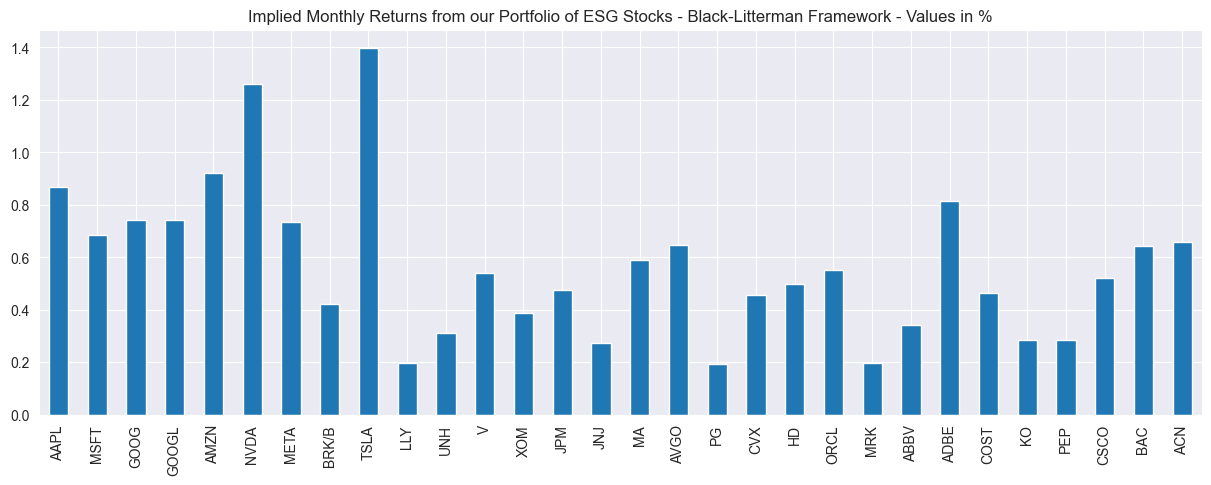

In [15]:
# calculating the % monthly implied returns
implied_returns_100 = implied_returns * 100

# plotting the % monthly implied returns
implied_returns_100.plot(kind = "bar", figsize = (15,5),
                     title = "Implied Monthly Returns from our Portfolio of ESG Stocks - Black-Litterman Framework - Values in %")

# showing the plot
plt.show()

## The Black-Litterman Model and the Scherer $\Omega$ - The Uncertanty Matrix

- The Black-Litterman model is a mathematical framework designed to integrate the current equilibrium conditions with individual investor perspectives. Through this integration, the model seeks to formulate an adjusted set of expected asset returns, which can be useful for portfolio optimization. This model is particularly appreciated for its ability to handle the subjective or quantitive views of investors.


#### **The new Expected Return Formula:**

$$mu_{BL} = \pi + \Sigma_{\text{scaled}} P^T \left( P \Sigma_{\text{scaled}} P^T + \Omega \right)^{-1} (Q - P \pi)$$


Where:
- **$\pi$** is the vector of portfolio implied returns.
- $\Sigma_{\text{scaled}}$ is the covariance matrix scaled by the scalar **$tau$**.
- **$P$** is the matrix linking the assets to the views.
- **$Q$** is the vector of views.
- **$\Omega$** is the uncertainty matrix of the views.

#### **The new VCV Formula:**

$$\Sigma_{BL} = \Sigma_{\text{scaled}} - \Sigma_{\text{scaled}} P^T \left( P \Sigma_{\text{scaled}} P^T + \Omega \right)^{-1} P \Sigma_{\text{scaled}}$$


Where:
- **$\Sigma_{\text{scaled}}$** is the covariance matrix scaled by the scalar \( \tau \).
- **$P$** is the matrix linking the assets to the views.
- **$\Omega$** is the uncertainty matrix of the views.


## **The "Scherer" method for $\Omega$ is implemented in this the code.**

In this scenario, the diagonal elements **$\omega_{k,k}$** of **$\Omega$** are set to the unexplained variances of the respective forecasting model. 

#### **The formula for $\omega_{k,k}$ and $\Omega$ is given by:**

$$
\omega_{k,k} = \sigma_k^2(1 - R_k^2)
$$


$$
\Omega = \begin{pmatrix}
\sigma_1^2(1 - R_1^2) & 0 & \cdots & 0 \\
0 & \sigma_2^2(1 - R_2^2) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_k^2(1 - R_k^2)
\end{pmatrix}
$$


#### *Scherer Method Explanation*

2. **$\sigma_k^2$**  represents the variance of the forecast error for the **$k$** th view. It's a measure of the dispersion or spread of the forecast errors.

3. **$R_k^2$** is the R-squared value for the **$k$** th, indicating the proportion of variance in the asset returns that is explained by the forecasting model. **$R_k^2$** values range from 0 to 1, with higher values indicating better explanatory power of the model.


In this method, the unexplained variance for each view is computed using the formula **$\omega_{k,k} = \sigma_k^2(1 - R_k^2)$**, and these values are placed on the diagonal of the uncertainty matrix **$\Omega$** to form a diagonal matrix.


# **Etimation of the Scherer $\Omega$**

### 1. Pairing of Assets
We started by forming all unique pairs of stocks from our returns dataset. These pairs were cataloged in a list.
A new data frame was initialized to record the differences in returns between each pair of stocks.
We then calculated the **differences in returns** for each unique pair and stored these differences in the newly created data frame.

### 2. Regression Analysis
A separate data frame was set up to store the outcomes of the regression analysis.
We traversed each column in the differences data frame, executing a linear regression analysis on each difference in returns against certain identified factors: **MKT,HML,SMB,MOM**
A constant term was appended to the independent variable for the regression analysis.
The Ordinary Least Squares (OLS) method was deployed to carry out the regression analysis.

### 3. Extraction of Regression Results
From each regression model, we garnered the monthly alpha (constant term), variance of the residuals, and the R-squared value.
These values were diligently stored in the designated data frame.
The regression results were arranged by the R-squared value in descending order to pinpoint the views with higher explanatory power.

### 4. Calculation of **$\omega_{k,k}$** and Construction of **$\Omega$**
We decided on a number of views we intended to consider based on their R-squared values.
With the information procured from the regression results, we computed each **$\omega_{k,k}$** using the formula **$\sigma_k^2(1 - R_k^2)$**, where **$\sigma_k^2$** denotes the variance of the residuals and **$R_k^2$** denotes the R-squared value for the **$k$** th view.

These **$\omega_{k,k}$** values were then situated on the diagonal of the matrix **$\Omega$** to compose a diagonal matrix, in adherence to the Scherer method to delineate the uncertainty associated with each view.

## `bl` Function - New $mu_{BL}$ and $\Sigma_{BL}$, based on the Views and on the Uncertanty Matrix

In [16]:
def bl(implied_returns, sigma, P, Q, tau, unexplained_variances, r_squared_s):
    
    # initializing an empty array for the diagonal elements of Omega
    omega_diag = np.zeros(len(Q))
    
    # computing the diagonal elements of Omega using the formula: unexplained variance * (1 - R^2)
    for j in range(len(omega_diag)): 
        omega_diag[j] = unexplained_variances[j] * (1-r_squared_s[j])

    # forming Omega with the computed diagonal values
    omega = np.diag(omega_diag)
    
    # scaling the sigma matrix by tau
    sigma_scaled = tau * sigma 
    
    # computing the Black-Litterman expected returns 'mu_bl' using the formula provided
    mu_bl = implied_returns + np.dot(
        np.dot(sigma_scaled, P.T),
        np.dot(
            np.linalg.inv(
                np.dot(
                    np.dot(P, sigma_scaled),
                    P.T
                ) + omega
            ),
            (Q - np.dot(P, implied_returns))))
    
    # computing the Black-Litterman covariance matrix 'sigma_bl' using the formula provided
    sigma_bl = sigma + sigma_scaled - np.dot(
        np.dot(
            np.dot(sigma_scaled, P.T), 
            np.linalg.inv(
                np.dot(
                    np.dot(P, sigma_scaled), 
                    P.T
                ) + omega)), np.dot(P, sigma_scaled))
    
    # returning the new blended vector of returns and the new weighted VCV
    return mu_bl, sigma_bl

## The Black-Litterman Model and the $\tau$ parameter consideration

In the Black-Litterman (BL) model, the parameter **$\tau$** is a scalar representing the uncertainty of the equilibrium returns relative to the views. 

- **When $\tau$ is closer to 0:**  
  The BL model tends to give more weight to the market equilibrium returns, and the resulting optimal portfolio is closer to the market-cap weighted portfolio.

- **As $\tau$ increases:**  
  More weight is given to the investor's views, making the resulting optimal portfolio drift further from the market-cap weighted portfolio.

In [17]:
# selecting a value for the tau parameter
tau = .002
tau

0.002

## Montly **$\alpha_k$**, **$\sigma_{rk}^2$** and **$R_k^2$** ,resulting from the Linear Regression Model - Factor Model

In [18]:
# getting all unique pairs of stocks in the returns df
pairs = list(itertools.combinations(returns.columns, 2))

# initializing an empty DataFrame to store differences in returns between pairs
diffs = pd.DataFrame()

# calculating the differences in returns for each unique pair of stocks
for pair in pairs:
    diffs[pair] = returns[pair[0]] - returns[pair[1]]

# initializing an empty DataFrame to store the results from regression analysis
reg_results = pd.DataFrame()

# iterating over each column in the diffs DataFrame
for col in diffs.columns:
    # adding a constant term to the independent variable for regression analysis
    X = factors_rets.values
    X = sm.add_constant(X)  # Add a constant term
    
    y = diffs[col].values
    # performing a linear regression using the OLS method
    model = sm.OLS(y, X).fit()
    
    # extracting the monthly alpha (constant term) from the regression results
    monthly_alpha = model.params[0]

    # calculating the variance of the residuals from the regression
    var_residuals = model.resid.var()
    
    # extracting the R-squared value from the regression results
    R_squared = model.rsquared_adj
    
    # storing the results (alpha, variance of residuals, R-squared) in the reg_results DataFrame
    reg_results[col] = [monthly_alpha , var_residuals, round(R_squared,5)]

# renaming the index of the reg_results DataFrame for better understanding
reg_results.index = ['Montly Alpha', 'Variance of Residuals', 'R-squared']

# sorting the regression results by R-squared value in descending order
reg_results = reg_results.T.sort_values("R-squared", ascending=False)

########################################################################
num_views = 10 # initializing the top number views to use
########################################################################

# Filtering the top_r_squared DataFrame for rows where Monthly Alpha is positive
positive_monthly_alpha = reg_results.loc[reg_results['Montly Alpha'] > 0]

# Displaying the filtered DataFrame
positive_monthly_alpha = positive_monthly_alpha.head(num_views)
positive_monthly_alpha

,Montly Alpha,Variance of Residuals,R-squared
"(JPM, KO)",0.006927,0.002367,0.45137
"(PEP, BAC)",0.000678,0.003613,0.45049
"(PG, BAC)",0.001697,0.004275,0.43432
"(MRK, BAC)",0.002771,0.004329,0.42572
"(AMZN, XOM)",0.014289,0.006806,0.42182
"(JPM, PEP)",0.003585,0.002684,0.40266
"(MSFT, XOM)",0.012817,0.004464,0.39279
"(CVX, KO)",0.002215,0.003269,0.37761
"(MSFT, BAC)",0.011422,0.004047,0.37332
"(COST, BAC)",0.008383,0.004626,0.37332


## Views Incorporation, Constraints and Final Weights

### Preparation of Inputs for Black-Litterman Model:
1. **Ordering of Stocks:**
- The order of stocks from our Portfolio of 30 stocks is obtained and stored in the `stock_order` list.
   
2. **Reshaping View Inputs:**
- The monthly alphas, variances of residuals, and R-squared values are reshaped into column vectors for compatibility with matrix operations.
   
3. **Formation of Matrix P:**
- An empty matrix `P` is initialized, representing the link between assets and views.
- The matrix `P` is populated based on the views, with 1 and -1 indicating the pair of assets in each view.
   
4. **Covariance Matrix:**
- The covariance matrix `Sigma` of the returns is computed.

5. **Black-Litterman Model Calculation:**
- The BL expected returns (`MU`) and covariance matrix (`SIGMA`) are computed using the `bl` function with the gathered inputs.

### Portfolio Optimization with Constraints:

1. **Inversion of Covariance Matrix:**
- The BL covariance matrix `SIGMA` is inverted to `inv_sigma`, to be used in the objective function.
   
2. **Calculation of BL Weights:**
- The BL portfolio weights `w_bl` are calculated using the formula **$(\Sigma^{-1} \mu) / \delta$**

3. **Objective Function Definition:**
- An objective function is defined to measure the squared difference between the portfolio weights and BL weights, aiming to minimize this difference.

4. **Initial Guess and Constraints:**
- An initial guess for the optimization is set to the BL weights.
- Constraints are defined to ensure the sum of weights equals 1 and the tracking error is within a specified limit.
   
5. **Bounds and Optimization:**
- Bounds are set for each weight between 0 and 0.10/0.6 (0.6 is the % of the equity portion in our Fund)
- The `minimize` function from SciPy is used to perform the optimization using Sequential Least Squares Programming (SLSQP), aiming to find a portfolio that closely follows the BL weights while also satisfying the constraints on individual weights and a tracking error limit.

7. **Tracking Error and Optimized Weights Extraction:**
- The tracking error for the optimized portfolio is computed.
- The optimized weights `bl_weights_constrained` are extracted from the optimization solution and rounded for better readability.

In [19]:
# getting the order of the stocks in the russell 50
stock_order = list(russell.index)

# reshaping the expected returns of the views to a column vector
Q = positive_monthly_alpha["Montly Alpha"].values.reshape(-1,1)

# initializing an empty matrix P with zeros
P = np.zeros((len(positive_monthly_alpha), len(stock_order)))

# iterating through the top 10 pairs to populate the P matrix based on views
for i, pair in enumerate(positive_monthly_alpha.index):
    # finding the positions of the stocks in the russell 50
    position_1 = stock_order.index(pair[0])
    position_2 = stock_order.index(pair[1])

    P[i, position_1] = 1
    P[i, position_2] = -1

# reshaping the variances of unexplained returns for each view to a column vector
unexplained_variances = positive_monthly_alpha["Variance of Residuals"].values.reshape(-1,1)

# reshaping the R squared values for each view to a column vector
r_squared_s = positive_monthly_alpha["R-squared"].values.reshape(-1,1)

# reshaping the implied returns to a column vector
implied_rets = implied_returns.values.reshape(-1,1)

In [20]:
# calculating the variance covariance matrix of the returns
Sigma = returns.cov()

###############################################################
perc_equity = 0.6 # 60% of the fund is on the equity branch
###############################################################

# computing the Black-Litterman expected returns and covariances using views and other inputs
MU, SIGMA = bl(implied_rets, Sigma, P, Q, tau, unexplained_variances, r_squared_s)

###############################################################################################################
###################################### CONSTRAINTS HANDLER ####################################################
###############################################################################################################

# inverting the Black-Litterman covariance matrix to use in the objective function
inv_sigma = np.linalg.inv(SIGMA)

# calculating the Black-Litterman portfolio weights
w_bl = (np.dot(inv_sigma, MU) / delta).reshape(-1)

# defining the objective function to measure the squared difference between the weights and Black-Litterman weights
def objective(weights): 
    '''Returns the squared difference between weights and BL weights'''
    diff = weights - w_bl
    return np.dot(diff, diff)

# defining a function to compute the tracking error between the portfolio and the benchmark (DJIA)
def tracking_error(weights, returns, ru50_rets):
    port_rets = np.dot(returns, weights.reshape(-1))
    te = np.std(port_rets - ru50_rets.values)
    return te

# defining a constraint function for the tracking error
def tracking_error_constraint(weights):
    te_value = tracking_error(weights, returns, ru50_rets)
    return 0.25 - te_value  # This should be >= 0 for the constraint to be satisfied

# setting an initial guess for the optimization to be the Black-Litterman weights
init_guess = w_bl

# defining the constraints for the optimization: sum of weights = 1 and tracking error constraint
constraints = (
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
    {'type': 'ineq', 'fun': tracking_error_constraint}
)

# defining bounds for each weight between 0 and 0.10
bounds = tuple((0,0.1/perc_equity) for asset in range(len(MU)))

# performing the optimization to minimize the objective function subject to constraints and bounds.

# This step aims to find a portfolio that closely follows the Black-Litterman suggested weights 
# while also satisfying constraints on the individual weights and a tracking error limit with respect to the RU50.

solution = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

###############################################################################################################
###############################################################################################################
###############################################################################################################

# calculating the tracking error for the optimized portfolio
te = tracking_error(solution.x, returns, ru50_rets)

# extracting the optimized weights from the solution
bl_weights_constrained = solution.x

# rounding the optimized weights for better readability
np.round(bl_weights_constrained * perc_equity,4)

array([0.0815, 0.0768, 0.0518, 0.0518, 0.04  , 0.0308, 0.024 , 0.0221,
       0.0203, 0.0168, 0.0147, 0.0147, 0.0106, 0.0149, 0.0111, 0.0109,
       0.0106, 0.0117, 0.0095, 0.0087, 0.0084, 0.0092, 0.0078, 0.0074,
       0.009 , 0.0052, 0.0071, 0.0065, 0.    , 0.006 ])

## Plotting Black-Litterman Weights Vs Initial Portfolio Weights + Final Equity Branch Allocation

************************************************************
Top 10 Views - Black-Litterman Model
************************************************************
             Montly Alpha  Variance of Residuals  R-squared
(JPM, KO)        0.006927               0.002367    0.45137
(PEP, BAC)       0.000678               0.003613    0.45049
(PG, BAC)        0.001697               0.004275    0.43432
(MRK, BAC)       0.002771               0.004329    0.42572
(AMZN, XOM)      0.014289               0.006806    0.42182
(JPM, PEP)       0.003585               0.002684    0.40266
(MSFT, XOM)      0.012817               0.004464    0.39279
(CVX, KO)        0.002215               0.003269    0.37761
(MSFT, BAC)      0.011422               0.004047    0.37332
(COST, BAC)      0.008383               0.004626    0.37332
************************************************************


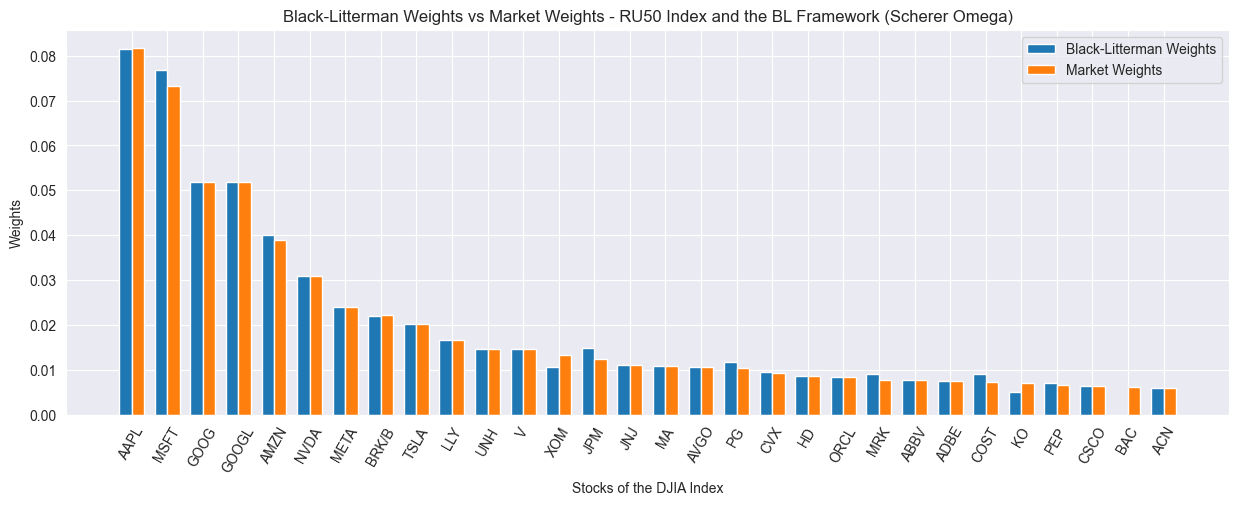

***************************************************************************
Active Portfolio Weights Vs Index Weights at 2023-10-20
***************************************************************************
Ticker             AAPL      MSFT      GOOG     GOOGL      AMZN      NVDA   
BL_Weight      0.081520  0.076844  0.051788  0.051788  0.040000  0.030842  \
InitialWeight  0.081667  0.073327  0.051876  0.051876  0.039022  0.030888   

Ticker             META     BRK/B      TSLA       LLY       UNH         V   
BL_Weight      0.023965  0.022129  0.020306  0.016752  0.014737  0.014709  \
InitialWeight  0.023997  0.022157  0.020330  0.016769  0.014751  0.014722   

Ticker              XOM       JPM       JNJ        MA      AVGO        PG   
BL_Weight      0.010586  0.014885  0.011096  0.010938  0.010640  0.011698  \
InitialWeight  0.013301  0.012552  0.011102  0.010944  0.010645  0.010543   

Ticker              CVX        HD      ORCL       MRK      ABBV      ADBE   
BL_Weight      0.00

In [21]:
# creating a dataframe to compare the calculated BL weights with the initial weights
diff = pd.DataFrame({"BL_Weight": bl_weights_constrained.reshape(-1) * perc_equity, "InitialWeight": w * perc_equity}, index=russell.index)

# setting the figure size for the plot
plt.figure(figsize=(15, 5))

# defining the positions for the bars in the bar plot
positions = np.arange(len(diff))

# defining the width of the bars
width = 0.35

# plotting the bars for Black-Litterman weights
plt.bar(positions - width/2, diff['BL_Weight'], width, label='Black-Litterman Weights')

# plotting the bars for initial weights
plt.bar(positions + width/2, diff['InitialWeight'], width, label='Market Weights')

# setting the x-axis label
plt.xlabel('Stocks of the DJIA Index')

# setting the y-axis label
plt.ylabel('Weights')

# setting the title of the plot
plt.title('Black-Litterman Weights vs Market Weights - RU50 Index and the BL Framework (Scherer Omega)')

# setting the x-ticks labels and rotating them for better readability
plt.xticks(positions, diff.index, rotation=60)

print("*"*60)
print(f"Top {num_views} Views - Black-Litterman Model")
print("*"*60)
print(positive_monthly_alpha)
print("*"*60)

# adding the legend to the plot
plt.legend()
# displaying the plot
plt.show()

print("*"*75)
print(f"Active Portfolio Weights Vs Index Weights at {str(returns.index[-1])[0:10]}")
print("*"*75)
# setting the option to display all columns
pd.set_option('display.max_columns', None)
# setting the option to display all rows
pd.set_option('display.max_rows', None)
print(diff.T)
print("*"*75)

In [22]:
# rounding the values in the "BL_Weight" column of the `diff` DataFrame to six decimal places using NumPy's `round` function.
diff["BL_Weight"] = np.round(diff["BL_Weight"],10)

# dropping the "InitialWeight" column from the `diff` DataFrame in-place, which means that the DataFrame `diff` is modified directly, without needing to assign the result back to `diff`.
diff.drop("InitialWeight", inplace=True, axis=1)

# multiplying every element in the `diff` DataFrame by 100, which is typically done to convert proportions to percentages.
diff = diff*100*1e6

# printing a line of asterisks (`*`) 85 characters long, for visual separation in the output.
print("*"*85)
# printing a formatted string that includes the text "Final Allocation - Equity Branch at" followed by a substring of the last index value from the `returns` DataFrame, showing only the first 10 characters of this index value.
print(f"Final Allocation - Equity Branch at {str(returns.index[-1])[0:10]}")
# printing another line of asterisks (`*`) 85 characters long, for visual separation in the output.
print("*"*85)
# setting a pandas display option to show all columns when printing a DataFrame, by passing `None` as the value, which removes any limitation on the number of columns to display.
pd.set_option('display.max_columns', None)
# setting another pandas display option to show all rows when printing a DataFrame, by passing `None` as the value, which removes any limitation on the number of rows to display.
pd.set_option('display.max_rows', None)
# printing the transposed version of the `diff` DataFrame, which swaps the rows and columns, making it easier to view if `diff` has many columns and fewer rows.
print(diff.T)
# printing yet another line of asterisks (`*`) 85 characters long, for visual separation in the output.
print("*"*85)

# calculating the % Shares in the equity branch
diff["Price"] = russell["Price"]
diff["% Shares"] =  diff["BL_Weight"] / diff["Price"]

########################################

# Specifying the name of the Excel file
file_name = 'EquityAllocation.xlsx'

# Saving the DataFrame to an Excel file
diff.to_excel(file_name, index=True)

########################################

*************************************************************************************
Final Allocation - Equity Branch at 2023-10-20
*************************************************************************************
Ticker           AAPL        MSFT        GOOG       GOOGL        AMZN   
BL_Weight  8151956.88  7684407.41  5178840.83  5178840.83  4000020.58  \

Ticker           NVDA        META       BRK/B        TSLA         LLY   
BL_Weight  3084192.76  2396506.31  2212896.29  2030575.16  1675174.11  \

Ticker            UNH           V         XOM         JPM         JNJ   
BL_Weight  1473724.45  1470854.98  1058556.37  1488542.93  1109565.58  \

Ticker            MA        AVGO          PG        CVX         HD       ORCL   
BL_Weight  1093790.7  1064020.63  1169801.39  954117.08  865317.52  842932.39  \

Ticker           MRK       ABBV       ADBE       COST         KO        PEP   
BL_Weight  919412.85  779900.89  744307.19  899580.32  517559.17  708896.76  \

Ticker          CS

## Expected Shape Ratio of the Black-Litterman Portfolio vs Russell 50 Index Vs Equally Weigthed Portfolio

In [23]:
# BLACK-LITTERMAN WEIGHTS CONSTRAINED ###########################################################################################

# computing the portfolio returns by multiplying the individual asset returns with their respective weights and summing them up
port_rets = np.dot(returns,bl_weights_constrained.reshape(-1,1)).sum(axis=1)

# calculating the average (expected) return of the portfolio
expected_port_rets = np.mean(port_rets)

# calculating the standard deviation (volatility) of the portfolio using the portfolio weights and covariance matrix
port_std = np.sqrt(np.dot(bl_weights_constrained,np.dot(Sigma,bl_weights_constrained.T)))

# computing the Sharpe ratio for the portfolio using the expected return, risk-free rate, and portfolio volatility
sharpe_ratio_port = (expected_port_rets - rf) / port_std

# EQUALLY WEIGHTED PORTFOLIO ######################################################################################################

# equally weighted portfolio 1/len(russel.index)
eq_weights = np.ones(len(russell.index)) / len(russell.index)

# computing the portfolio returns by multiplying the individual asset returns with their respective equal weights and summing them up
ew_rets = np.dot(returns,eq_weights.reshape(-1,1)).sum(axis=1)

# calculating the average (expected) return of the equally weighted portfolio
expected_eq_rets = np.mean(ew_rets)

# calculating the standard deviation (volatility) of the equally weighted portfolio using the portfolio weights and covariance matrix
port_std = np.sqrt(np.dot(eq_weights,np.dot(Sigma,eq_weights.T)))

# computing the Sharpe ratio for the portfolio using the expected return, risk-free rate, and portfolio volatility
sharpe_ratio_eqport = (expected_eq_rets - rf) / port_std

###################################################################################################################################

# printing the calculated Sharpe ratio for the Index and for the Portfolio using the Black Litterman Model
# creating a new PrettyTable object
table = PrettyTable()
# defining the column names for your table
table.field_names = ["Description", "Expected Sharpe Ratio (MONTHLY)", "Tracking Error (%)"]
# adding rows to the table with your data
table.add_row(["Russell 50 Mega-Cap Index", f"{sharpe_ratio:.4f}", "0"])
table.add_row(["Equally Weighted Portfolio", f"{sharpe_ratio_eqport:.4f}", "-"])
table.add_row(["Portfolio - Black Litterman Model", f"{sharpe_ratio_port:.4f}", f"{(te*100):.4f}"])
# printing the table to the console
print(table)

+-----------------------------------+---------------------------------+--------------------+
|            Description            | Expected Sharpe Ratio (MONTHLY) | Tracking Error (%) |
+-----------------------------------+---------------------------------+--------------------+
|     Russell 50 Mega-Cap Index     |              0.1169             |         0          |
|     Equally Weighted Portfolio    |              0.2579             |         -          |
| Portfolio - Black Litterman Model |              0.2925             |       6.8678       |
+-----------------------------------+---------------------------------+--------------------+


# **2.ETF (Exchange Traded Funds) Branch - Allocations**

- Our expert team of market analysts has meticulously selected a diversified ETF portfolio, designed to capitalize on both emerging and established market trends. This selection stems from a thorough analysis, during which we considered various factors, including sectoral growth forecasts, financial stability, the quality of corporate management, and competitive positioning.The portfolio in question represents 40% of the ETF assets and is strategically distributed across five pivotal funds: SMH US Equity, SPY US Equity, CIBR US Equity, QQQ US Equity, and AIQ US Equity. 

## 1.SMH US Equity

- This ETF specifically focuses on information technology investments, particularly in the semiconductor sector, which is a critical component of modern computing technologies, including but not limited to smartphones, computers, and various other devices. The continuous innovation and expansion in the tech sector, particularly in AI, offer a broad theme that investors, including those who are young and perhaps more tech-savvy, might find appealing to invest in through this ETF. The growth potential of the semiconductor sector and the diversified exposure provided by this ETF to major US-listed semiconductor companies can offer a relatively balanced way to capitalize on the upward trends in tech-related markets, making it a potentially interesting choice for young investors looking for growth-oriented investments with a tech focus.

## 2. SPY US Equity

- Unlike the more sector-specific investment approach of SMH US Equity, SPY encompasses a wide range of sectors including technology, healthcare, finance, consumer discretionary, and others. This diversity can provide a level of stability and risk mitigation, making it potentially appealing to both young investors looking to build a foundational investment portfolio and more seasoned investors seeking to maintain a balanced asset allocation. Its low expense ratio and high liquidity make it a cost-effective option for investors to access the growth potential inherent in the US equity market, with the added benefit of a dividend yield. Over the long term, investing in SPY can provide a reflection of the broader economic trends and performance of the US corporate sector, offering a relatively straightforward way to participate in the American economic narrative. Through SPY, investors can achieve a diversified exposure to leading US companies, which might be particularly attractive in a long-term investment horizon.


## 3. CIBR US Equity

- The index provides a gauge for investors keen on gaining exposure to the cybersecurity sector. By tracking companies in this field, investors can potentially benefit from the growing importance and investment in cybersecurity infrastructure globally. Through its well-structured composition, the NQCYBR Index reflects the broader trends and performance metrics of the cybersecurity industry, making it a relevant indicator for investors and market analysts keen on understanding or investing in this sector.

## 4. QQQ US Equity

- The Index reflects companies across major industry groups including computer hardware and software, telecommunications, retail/wholesale trade and biotechnology.Invesco QQQ was rated the best-performing large-cap growth fund based on total return over the past 15 years by Lipper. It was also the 2nd-most traded ETF in the US based on average daily volume traded as of June 30, 2023. The ETF has a 5-Star Morningstar Rating, indicating strong past performance. The 10 largest holdings in Invesco QQQ made up almost 60% of the fund's assets as of the end of June, with Microsoft and Apple each representing more than 12% of the portfolio. Being one of the most traded ETFs in the US, Invesco QQQ provides liquidity and accessibility to investors wanting to gain exposure to the prominent non-financial companies listed on the Nasdaq

## 5. AIQ US Equity

- The Fund seeks to track the performance of the Indxx Artificial Intelligence and Big Data Index. The index tracks companies in developed markets positioned to benefit from the utilization of artificial intelligence  technology in their products and services.This ETF is structured to invest in companies situated in developed markets that are poised to benefit from the adoption and utilization of artificial intelligence (AI) technology in their products and services. The global AI market is projected to expand significantly, from $30 billion in 2020 to $300 billion by 2026, representing a potential high growth opportunity for investors


# **Getting the data**

In [24]:
# reading the Excel file "DATA.xlsx" and selecting the sheet named "Etfs" to be loaded into a DataFrame called "etfs".
etfs = pd.read_excel("DATA.xlsx", sheet_name="Etfs")

# setting the "Date" column as the index of the DataFrame, which helps in time-series data analysis.
etfs.set_index("Date", inplace=True)

# calculating the percentage change of the DataFrame values from one row to the next, which results in a new DataFrame with the percentage changes. Dropping any rows with missing values (NA/NaN) from the DataFrame.
etfs_rets = etfs.pct_change().dropna()

# displaying the last five rows of the DataFrame "etfs_rets" to observe the most recent data.
etfs_rets.tail()

,SMH US Equity,SPY US Equity,CIBR US Equity,QQQ US Equity,AIQ US Equity
Date,,,,,
2023-06-30,0.054874,0.060859,0.028772,0.061582,0.070034
2023-07-31,0.054975,0.032733,0.036115,0.038601,0.059728
2023-08-31,-0.027394,-0.016252,0.002338,-0.014830,-0.035775
2023-09-29,-0.071950,-0.050783,-0.036684,-0.052171,-0.058103
2023-10-20,-0.019865,-0.014714,-0.013647,-0.010244,-0.023411


- Poised for Prolific Growth: Our chosen ETFs, led by the spotlight on SMH US Equity, are structured for significant appreciation in the coming years. While some ETFs may move in harmony with the Russell 50 Index, our portfolio, especially from 2023 onwards, is set to soar exponentially. The robust foundation of SPY coupled with the tech-centric nature of QQQ and the specialized focus of CIBR US Equity and AIQ US Equity, lays the groundwork for a resilient and potentially rewarding portfolio.

- Semiconductor Surge: SMH US Equity, honed in on the semiconductor realm, stands on the cusp of a transformative era. The anticipated technological advancements—from heightened AI prowess to 6G connectivity—are projected to bolster semiconductor demand, positioning SMH not merely as a present achiever, but a prospective leader.

- Expanding Horizons through Diversification: By including a broad spectrum of sectors through our ETF selections, we aim to buffer against sector-specific slumps while capturing the upticks of sectoral surges. The comprehensive market representation through SPY adds a level of diversification that could prove invaluable in mitigating risks and capturing broader market movements.

- Riding the Macro Waves: Our growth-centric ETF selections like QQQ and CIBR US Equity are our stakes in the enterprises of the future. As innovation continues to be rewarded and as agile, emergent companies reshape industries, these ETFs are geared to encapsulate the essence of the success narratives of tomorrow.

- Aligning with Future Tech: By focusing on sectors pivotal to the tech-infused future, such as semiconductors through SMH US Equity, and AI through AIQ US Equity, we're delineating an investment trajectory that reflects the tech-enthusiastic outlook and aspirations of contemporary youth.

- Simplified Investing for Tomorrow: The future is about melding simplicity with efficacy. Our wide-angle ETF strategy resonates with the young investor who desires a potent yet straightforward investment portfolio. Through ETFs like AIQ US Equity, which focuses on artificial intelligence, and the broader market exposure provided by SPY, we're making streamlined, future-focused investing accessible

## Final Allocation for the (Exchange Traded Funds) Branch - Risk Parity Algorithm 

## Methodology

Outlined below are the key functions and steps involved in the implementation of the Risk Parity Algorithm for our ETF portfolio optimization:

1. **Ensuring Valid Portfolio Weights**:
- Function: `check_sum(weights)`
- Objective: This function is pivotal in ensuring that the sum of the portfolio weights equals 1, a prerequisite for a valid portfolio.


2. **Computing Portfolio Metrics**:
- Function: `get_ret_vol_sr(weights)`
- Objective: This function computes and returns the portfolio's expected return, volatility, and Sharpe ratio given a set of asset weights. These metrics are crucial for evaluating the performance and risk-adjusted returns of the portfolio.


3. **Optimizing Sharpe Ratio**:
- Function: `neg_sharpe(weights)`
- Objective: This function returns the negative of the Sharpe ratio, aiding in the optimization process as the objective is to maximize the Sharpe ratio.


4. **Calculating Risk Contributions**:
- Function: `riskcontributions(weights)`
- Objective: This function computes the risk contributions of each asset to the portfolio, an essential step towards achieving risk parity among the assets.


5. **Optimization Setup**:
- Constraints and Bounds: The constraints ensure that the sum of weights equals 1 and that the risk contributions from each asset are equal. Bounds ensure that asset weights remain between 0 and 1.
- Initial Guess: An initial guess for the asset weights is set as equally weighted.

6. **Performing Optimization**:
- The optimization is carried out using the 'SLSQP' method to find the asset weights that maximize the Sharpe ratio while adhering to the constraints and bounds set forth.

7. **Results Compilation**:
- A DataFrame is created to hold the tickers and the optimized weights, which is then adjusted based on a certain percentage of equity. The final adjusted weights of the ETFs are then displayed.

8. **Equity Adjustment**:
- The weights are further adjusted based on a predefined percentage of equity, finalizing the portfolio allocation.


In [25]:
# defining a function to ensure the sum of the portfolio weights is 1, a requirement for a valid portfolio.
def check_sum(weights):
    return np.sum(weights) - 1

# defining a function to calculate and return the portfolio's expected return, volatility, and Sharpe ratio given a set of asset weights.
def get_ret_vol_sr(weights):
    weights = np.array(weights)  # converting weights to a numpy array for efficient mathematical operations.
    port_return = np.sum(etfs_rets.mean() * weights)  # calculating the expected portfolio return.
    vol = np.sqrt(np.dot(weights.T, np.dot(etfs_rets.cov(), weights)))  # calculating the expected portfolio volatility.
    sr = port_return / vol  # calculating the Sharpe Ratio of the portfolio.
    return np.array([port_return, vol, sr])  # returning the calculated values as a numpy array.

# defining a function to return the negative of the Sharpe ratio, as the optimization function minimizes the objective.
def neg_sharpe(weights):
    return -get_ret_vol_sr(weights)[2]

# defining a function to calculate the risk contributions of each asset to the portfolio.
def riskcontributions(weights):
    marginal_contrib = np.dot(etfs_rets.cov(), weights)  # calculating the marginal contribution to risk of each asset.
    risk_contrib = weights * marginal_contrib  # calculating the risk contribution of each asset.
    return np.std(risk_contrib)  # returning the standard deviation of risk contributions, to be minimized.

# setting up the constraints for the optimization: sum of weights equals 1 and equal risk contributions.
cons = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': riskcontributions})

# creating the bounds for each weight to ensure they are between 0 and 1.
bounds = [(0, 1) for asset in range(len(etfs_rets.columns))]

# setting an initial guess for the asset weights, equally weighted.
init_guess = np.repeat(1 / len(etfs_rets.columns), len(etfs_rets.columns))

# performing the optimization to find the asset weights that maximize the Sharpe ratio while adhering to the constraints and bounds.
opt_results_maxsr = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# creating a DataFrame to hold the tickers and the optimized weights.
etf_weights = pd.DataFrame({"Ticker": etfs_rets.columns, "WeightEtfs" :opt_results_maxsr.x})

# setting the "Ticker" column as the index of the DataFrame for easier referencing.
etf_weights.set_index("Ticker",inplace=True)

# adjusting the weights based on a certain percentage of equity (assuming perc_equity is defined elsewhere).
etf_weights = etf_weights.T * (1-perc_equity)

# displaying the final adjusted weights of the ETFs.
print(etf_weights)

Ticker      SMH US Equity  SPY US Equity  CIBR US Equity  QQQ US Equity   
WeightEtfs       0.062782       0.097852        0.083716       0.080208  \

Ticker      AIQ US Equity  
WeightEtfs       0.075441  


In [26]:
# creating a etf_allocation dataframe
etf_allocation = pd.DataFrame({"ETF_Weight":etf_weights.iloc[0] * 100 * 1e6},index =etf_weights.columns)

# calculating the % Shares
etf_allocation["Price"] = etfs.iloc[-1]
etf_allocation["# Shares"] = etf_allocation["ETF_Weight"] / etf_allocation["Price"]

##############################################

# specifying the name of the Excel file
file_name = 'EtfsAllocation.xlsx'

# saving the DataFrame to an Excel file
etf_allocation.to_excel(file_name, index=True)

##############################################

# printing a line of asterisks (`*`) 52 characters long, for visual separation in the output.
print("*"*52)
# printing a formatted string that includes the text "Final Allocation - Equity Branch at" followed by a substring of the last index value from the `returns` DataFrame, showing only the first 10 characters of this index value.
print(f"Final Allocation - ETFs Branch at {str(returns.index[-1])[0:10]}")
# printing another line of asterisks (`*`) 52 characters long, for visual separation in the output.
print("*"*52)
# printing the transposed version of the `diff` DataFrame, which swaps the rows and columns, making it easier to view if `diff` has many columns and fewer rows.
print(etf_allocation)
# printing yet another line of asterisks (`*`) 52 characters long, for visual separation in the output.
print("*"*52)

****************************************************
Final Allocation - ETFs Branch at 2023-10-20
****************************************************
                  ETF_Weight   Price       # Shares
Ticker                                             
SMH US Equity   6.278239e+06  142.10   44181.837260
SPY US Equity   9.785195e+06  421.19   23232.259698
CIBR US Equity  8.371621e+06   44.81  186824.847241
QQQ US Equity   8.020810e+06  354.60   22619.317728
AIQ US Equity   7.544134e+06   26.28  287067.503501
****************************************************


## Expected Shape Ratio of the Risk Parity ETFs Portfolio vs Russell 50 Index Vs Equally Weigthed Portfolio

In [27]:
# aligning the indices of ru50_rets DataFrame to that of etfs_rets DataFrame to ensure consistency.
ru50_rets = ru50_rets.loc[etfs_rets.index] 

# SHARPE RATIO #########################################################################################

# calculating the expected monthly return of the Russell 50 Index by computing the mean of ru50_rets.
expected_return = np.mean(ru50_rets)

# calculating the monthly standard deviation of the Russell 50 Index.
std = np.std(ru50_rets).values[0]

# calculating the Sharpe ratio for the Russell 50 Index using the formula: (expected return - risk-free rate) / standard deviation.
sharpe_ratio = (expected_return - rf) / std

# extracting the optimized asset weights from the previous optimization result.
allocation_etfs = opt_results_maxsr.x

# computing the portfolio returns by taking the dot product of the ETF returns and the optimized asset weights, and summing along the rows.
port_rets = np.dot(etfs_rets, allocation_etfs.reshape(-1,1)).sum(axis=1)

# calculating the expected (average) return of the portfolio.
expected_port_rets = np.mean(port_rets)

# calculating the portfolio standard deviation (volatility) using the formula: sqrt(weights^T * covariance matrix * weights).
# Note: bl_weights_constrained and Sigma need to be defined elsewhere in the code.
port_std = np.sqrt(np.dot(bl_weights_constrained,np.dot(Sigma,bl_weights_constrained.T)))

# calculating the Sharpe ratio for the portfolio using the formula: (expected portfolio return - risk-free rate) / portfolio standard deviation.
sharpe_ratio_port = (expected_port_rets - rf) / port_std

# calculating the Tracking Error, which measures the standard deviation of the difference between the returns of the portfolio and the Russell 50 Index.
te = round(np.std(port_rets - ru50_rets.values),2)

# printing the calculated Sharpe ratios for the Russell 50 Index and for the portfolio, along with the Tracking Error.
# creating a new PrettyTable object
table = PrettyTable()
# defining the column names for your table
table.field_names = ["Description", "Expected Sharpe Ratio (MONTHLY)", "Tracking Error (%)"]
# adding rows to the table with your data
table.add_row(["Russell 50 Mega-Cap Index", f"{sharpe_ratio:.4f}", "0"])
table.add_row(["Risk Parity Portfolio", f"{sharpe_ratio_port:.4f}", f"{(te*100):.4f}"])

# printing the table to the console
print(table)

+---------------------------+---------------------------------+--------------------+
|        Description        | Expected Sharpe Ratio (MONTHLY) | Tracking Error (%) |
+---------------------------+---------------------------------+--------------------+
| Russell 50 Mega-Cap Index |              0.1182             |         0          |
|   Risk Parity Portfolio   |              0.1503             |       8.0000       |
+---------------------------+---------------------------------+--------------------+


# **Overall Sectors Exposure of our Portofolio**

![](EXPOSURE.png)

# **Back Testing Procedure for the Equity and the Exchange Traded Branch - The overall value of the fund over 4 Years**

In [28]:
# loading the market capitalization data from the Excel file "DATA.xlsx" from the sheet named "HiMarketCap"
mktCap_ru50 = pd.read_excel("DATA.xlsx", sheet_name="HiMarketCap")

# setting the "Date" column as the index of the DataFrame
mktCap_ru50.set_index("Date", inplace=True)

# calculating the total market capitalization for each date by summing across the rows
tot_market_cap = mktCap_ru50.sum(axis=1).values

# initializing a DataFrame to store the market capitalization weights
weights_mkcap = mktCap_ru50

# iterating through each row of the market capitalization DataFrame
for i in range(mktCap_ru50.shape[0]):
    # updating the DataFrame to store the market capitalization weights by dividing each element by the total market capitalization for that date
    weights_mkcap.iloc[i,:] = mktCap_ru50.iloc[i,:] / tot_market_cap[i]

# displaying the initial row of the DataFrame to check the final market capitalization weights
weights_mkcap.head(5)


,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,META,BRK/B,TSLA,LLY,UNH,V,XOM,JPM,JNJ,MA,AVGO,PG,CVX,HD,ORCL,MRK,ABBV,ADBE,COST,KO,PEP,CSCO,BAC,ACN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-30,0.096611,0.063430,0.068002,0.068002,0.026600,0.001956,0.029160,0.060392,0.004901,0.012575,0.014036,0.027170,0.083901,0.040274,0.054451,0.016393,0.003015,0.042457,0.045417,0.020675,0.034646,0.032608,0.015799,0.005836,0.009672,0.034076,0.024750,0.022627,0.030302,0.010264
2014-05-30,0.101360,0.062866,0.070878,0.070878,0.026736,0.001971,0.030199,0.058765,0.004793,0.012457,0.014505,0.028176,0.080253,0.039097,0.053359,0.016605,0.003282,0.040639,0.043453,0.020397,0.034830,0.031433,0.016059,0.005972,0.009487,0.033425,0.024894,0.023445,0.029596,0.010192
2014-06-30,0.102391,0.062944,0.071435,0.071435,0.027310,0.001890,0.031556,0.057052,0.005443,0.012717,0.014637,0.027166,0.079005,0.039849,0.054085,0.015686,0.003315,0.038860,0.045413,0.020232,0.032993,0.030893,0.016415,0.006577,0.009223,0.034021,0.024750,0.023262,0.029534,0.009910
2014-07-31,0.105254,0.065390,0.071543,0.071543,0.026590,0.001795,0.034732,0.056882,0.005095,0.012544,0.014602,0.027097,0.078123,0.039884,0.052065,0.015788,0.003211,0.038470,0.045237,0.020331,0.033084,0.030488,0.015323,0.006333,0.009472,0.031685,0.024408,0.023764,0.029487,0.009778
2014-08-29,0.108441,0.066139,0.068901,0.068901,0.027677,0.001862,0.034371,0.059741,0.005939,0.012547,0.014880,0.026225,0.074943,0.039508,0.051689,0.015510,0.003651,0.039760,0.043432,0.022235,0.032689,0.030636,0.015554,0.006318,0.009376,0.032330,0.024623,0.022618,0.029895,0.009607


In [29]:
# displaying the last row of the DataFrame to check the final market capitalization weights
weights_mkcap.tail(5)

,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,META,BRK/B,TSLA,LLY,UNH,V,XOM,JPM,JNJ,MA,AVGO,PG,CVX,HD,ORCL,MRK,ABBV,ADBE,COST,KO,PEP,CSCO,BAC,ACN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-06-30,0.151220,0.125505,0.075729,0.075729,0.066296,0.051789,0.036453,0.036941,0.041124,0.022066,0.022180,0.024699,0.021492,0.021066,0.021320,0.018473,0.017743,0.017727,0.014777,0.015480,0.016022,0.014513,0.011782,0.011047,0.011826,0.012908,0.012648,0.010451,0.011332,0.009659
2023-07-31,0.147702,0.119303,0.080111,0.080111,0.065565,0.055173,0.039188,0.036797,0.040575,0.020626,0.022536,0.023725,0.020520,0.022065,0.020813,0.017758,0.017728,0.017648,0.014496,0.016044,0.015210,0.012936,0.012615,0.011900,0.011877,0.012802,0.012335,0.010137,0.012155,0.009549
2023-08-31,0.140774,0.116713,0.082644,0.082644,0.068247,0.058427,0.036491,0.037657,0.039260,0.025215,0.021158,0.024583,0.021333,0.020381,0.018609,0.018634,0.018254,0.017434,0.014417,0.015832,0.015661,0.013254,0.012432,0.012219,0.011666,0.012400,0.011739,0.011201,0.010919,0.009799
2023-09-29,0.134826,0.118164,0.083421,0.083421,0.066064,0.054118,0.038910,0.038482,0.040003,0.025683,0.023524,0.024188,0.023709,0.021228,0.018840,0.018789,0.017267,0.017316,0.015859,0.015221,0.014615,0.013158,0.013252,0.011694,0.012600,0.012193,0.011749,0.010980,0.010959,0.009769
2023-10-20,0.136111,0.122212,0.086460,0.086460,0.065036,0.051479,0.039995,0.036929,0.033884,0.027949,0.024584,0.024537,0.022168,0.020920,0.018503,0.018240,0.017742,0.017572,0.015687,0.014424,0.014050,0.013120,0.012998,0.012403,0.012328,0.011884,0.011078,0.010797,0.010498,0.009953


## Every month we rebalance the Portfolio and we aim at maximazing the Sharpe Ratio, in order to do so we need the historical data for the risk free rate

In [30]:
# initializing a YieldCurve model with a specified number of years back (10 years in this case)
model = YieldCurve(years_back=10)

# extracting the yield curve data from the model
yied_curve = model.yield_curve_df

# converting the index of the yield curve DataFrame to datetime format for easier manipulation
yied_curve.index = pd.to_datetime(yied_curve.index, format='%m/%d/%Y')

# resampling the yield curve DataFrame to get the last entry for each month
monthly_data = yied_curve.resample('M').last()

# extracting the most recent (today's) data from the yield curve DataFrame
todays_data = yied_curve.iloc[-1]

# creating a new DataFrame that combines the monthly data with today's data
new_rf = pd.concat([monthly_data, pd.DataFrame(todays_data).transpose()])

# displaying the first rows of the new_rf df
new_rf.head()

Fetching Process --->  Done                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

,1,3,6,12,24,36,60,84,120,240,360
2014-01-31,0.03,0.02,0.06,0.10,0.34,0.69,1.49,2.13,2.67,3.35,3.61
2014-02-28,0.04,0.05,0.08,0.12,0.33,0.69,1.51,2.13,2.66,3.31,3.59
2014-03-31,0.03,0.05,0.07,0.13,0.44,0.90,1.73,2.30,2.73,3.31,3.56
2014-04-30,0.02,0.03,0.05,0.11,0.42,0.87,1.69,2.25,2.67,3.22,3.47
2014-05-31,0.05,0.04,0.06,0.10,0.37,0.79,1.54,2.06,2.48,3.05,3.33


In [31]:
# displaying the last rows of the new_rf df
new_rf.tail()

,1,3,6,12,24,36,60,84,120,240,360
2023-07-31,5.48,5.55,5.53,5.37,4.88,4.51,4.18,4.08,3.97,4.22,4.02
2023-08-31,5.52,5.56,5.48,5.37,4.85,4.54,4.23,4.19,4.09,4.39,4.20
2023-09-30,5.55,5.55,5.53,5.46,5.03,4.80,4.60,4.61,4.59,4.92,4.73
2023-10-31,5.57,5.58,5.56,5.42,5.05,4.89,4.81,4.87,4.86,5.19,5.01
2023-10-23,5.57,5.58,5.56,5.42,5.05,4.89,4.81,4.87,4.86,5.19,5.01


In [32]:
# MAIN FUNCTION - BacktestingBlEtfs

def BacktestingBlEtfs(weights_mkcap, stocks_returns, factor_returns, index_retuns, etfs_returns, rf_df, tau, number_of_views = 5, n_year = 4,
                   perc_equity = 0.6):

    # getting the total number of month to be tester by converting the 'n_year' parameter
    number_of_months = 12*n_year

    # showing some data of the backtesting
    print(f"Length of the Back Testing Procedure: {(number_of_months)} Months + {str(weights_mkcap.index[-1])[8:10]} Days")

    # inizialing a vector for the back tested returns of the Black-Litterman Portfolio
    RetsPort = np.zeros(number_of_months)
    # inizialing a vector for the back tested returns of Equally Weighted Portfolio
    EwPorRets = np.zeros(number_of_months)

    # STARTING OF THE LOOP ***********************************************************************************************************
    # ********************************************************************************************************************************

    # iterating over the number of month
    for month in range(number_of_months):

        # just showing some progress
        percentage_advancement = ((month+ 1) / number_of_months) * 100
        print(f'\rBack Testing Procedure - {n_year} Years - Month {month + 1}, Progress: {percentage_advancement:.2f}%', end=''*30)

        # we have monthly data, thus the starting index of the analysis is: 
        # ((number_of_months + 1) - month), every loop in reverse because we are going to use the '-' indentation
        starting_index = (number_of_months + 1) - month

        # using the starting_index we take the current weights.
        # those are the weights in the index that we are going to use every time as a starting point
        current_weights = weights_mkcap.iloc[-starting_index,:].values

        # using the starting_index we take the current stocks returns
        stocks_returns_current = stocks_returns.iloc[:-starting_index,:]

        # using the starting_index we take the current factor returns 
        factor_returns_current = factor_returns.iloc[:-starting_index,:]

        # using the starting_index we take the current index returns 
        index_retuns_current = index_retuns.iloc[:-starting_index,:]

        # using the starting_index we take the current etf returns 
        etfs_returns_current = etfs_returns.iloc[:-starting_index,:]

        # using the starting_index we take the current monthly 10-yers Yield, from tresury.gov
        rf = rf_df.iloc[-starting_index,:][120] / 100 / 12

        # using the BL formula we compute the current risk aversion parameter
        current_delta = ((np.mean(index_retuns_current) - rf) / np.var(index_retuns_current)).values[0]

        # getting the current variance covariance matrix
        # every loop here we incorporate more information
        # it's what we would have done if we had had put in place this strategy in the past
        current_sigma = stocks_returns_current.cov()

        ##### 'perc_equity' % OF THE FUND ###################################################################
        #####################################################################################################

        ## Black - Litterman Framework -------------------------------------------------------------
        ## -----------------------------------------------------------------------------------------

        # blending all togheter to get the current impplied market equilibrium returns
        implied_returns_current = implied_returns_func(current_delta, current_sigma, current_weights) 

        # forming each possible pair
        pairs = list(itertools.combinations(stocks_returns_current.columns, 2))

        # creating a new df to store the data
        diffs = pd.DataFrame()

        # for each pair of stock we take the difference in their past returns
        for pair in pairs:
            diffs[pair] = stocks_returns_current[pair[0]] - stocks_returns_current[pair[1]]

        # df to store the metrics
        reg_results = pd.DataFrame()

        # for every column, we regress the difference in returns on the returns of the factors storing the result in the reg_results df
        for col in diffs.columns:
            # creating the X variable
            X = factor_returns_current.values
            # adding to the X matrix a constant
            X = sm.add_constant(X) 
            # retrieving the dependent variable
            y = diffs[col].values
            # performing the linear regression
            model = sm.OLS(y, X).fit()
            # calculating the alpha
            monthly_alpha = model.params[0]
            # variance of the residuals
            var_residuals = model.resid.var()
            # r squared of the model
            R_squared = model.rsquared_adj
            reg_results[col] = [monthly_alpha , var_residuals, round(R_squared,5)]
        reg_results.index = ['Montly Alpha', 'Variance of Residuals', 'R-squared']
        reg_results = reg_results.T.sort_values("R-squared", ascending=False)

        # how many top views we are going to consider?
        num_views = number_of_views

        # selecting only the positive views and the top 'num_views' ones
        positive_monthly_alpha = reg_results.loc[reg_results['Montly Alpha'] > 0]
        positive_monthly_alpha = positive_monthly_alpha.head(num_views)

        # preparing some variables to create the P matrix and the Q vectors
        stock_order = list(stocks_returns_current.columns)

        # vector with the views - Montly Alpha
        Q = positive_monthly_alpha["Montly Alpha"].values.reshape(-1,1)

        # initializing an empty matrix P with zeros
        P = np.zeros((len(positive_monthly_alpha), len(stock_order)))

        # iterating through the top 'num_views' pairs to populate the P matrix based on views
        for i, pair in enumerate(positive_monthly_alpha.index):
            # finding the positions of the stocks in the russell 50
            position_1 = stock_order.index(pair[0])
            position_2 = stock_order.index(pair[1])

            P[i, position_1] = 1 ; P[i, position_2] = -1

        # reshaping the variances of unexplained returns for each view to a column vector
        unexplained_variances = positive_monthly_alpha["Variance of Residuals"].values.reshape(-1,1)

        # reshaping the R squared values for each view to a column vector
        r_squared_s = positive_monthly_alpha["R-squared"].values.reshape(-1,1)

        # computing the Black-Litterman expected returns and covariances using views and other inputs
        MU, SIGMA = bl(implied_returns_current.values.reshape(-1,1), current_sigma, P, Q, tau, unexplained_variances, r_squared_s)

        # inverting the Black-Litterman covariance matrix to use in the objective function
        inv_sigma = np.linalg.inv(SIGMA)

        # calculating the Black-Litterman portfolio weights
        w_bl = (np.dot(inv_sigma, MU) / delta).reshape(-1)

        # defining the objective function to measure the squared difference between the weights and Black-Litterman weights
        def objective(weights): 
            '''Returns the squared difference between weights and BL weights'''
            diff = weights - w_bl
            return np.dot(diff, diff)

        # setting an initial guess for the optimization to be the Black-Litterman weights
        init_guess = w_bl

        # defining the constraints for the optimization: sum of weights = 1
        constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

        # defining bounds for each weight between 0 and 0.10/perc_equity
        bounds = tuple((0,0.1/perc_equity) for asset in range(len(MU)))

        # performing the optimization to minimize the objective function subject to constraints and bounds.

        # This step aims to find a portfolio that closely follows the Black-Litterman suggested weights 
        # while also satisfying constraints on the individual weights and a tracking error limit with respect to the RU50.
        solution = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

        # extracting the optimized weights from the solution
        bl_weights_constrained = solution.x
        
        # correcting the optimized weights for the perc_equity parameter
        bl_weights_constrained_equity_part = bl_weights_constrained * perc_equity

        ##### (1-'perc_equity') % OF THE FUND ######################################################################
        ############################################################################################################

        ## Risk - Parity Etfs Framework ---------------------------------------------------------------------------
        ## -------------------------------------------------------------------------------------------------------- 

        # defining a function to ensure that the sum of the weights in the portfolio equals 1, which is a requirement for a valid portfolio.
        def check_sum(weights):
            return np.sum(weights) - 1

        # defining a function to calculate and return the expected return, volatility, and Sharpe ratio of the portfolio given a set of weights.
        def get_ret_vol_sr(weights):
            weights = np.array(weights)  # converting the weights to a numpy array for efficient mathematical operations.
            port_return = np.sum(etfs_returns_current.mean() * weights)  # calculating the expected portfolio return.
            vol = np.sqrt(np.dot(weights.T, np.dot(etfs_returns_current.cov(), weights)))  # calculating the portfolio volatility.
            sr = port_return / vol  # calculating the Sharpe Ratio of the portfolio.
            return np.array([port_return, vol, sr])  # returning the calculated values as a numpy array.

        # defining a function to return the negative of the Sharpe ratio, as the optimization function minimizes the objective.
        def neg_sharpe(weights):
            return -get_ret_vol_sr(weights)[2]

        # defining a function to calculate the risk contributions of each asset to the portfolio.
        def riskcontributions(weights):
            marginal_contrib = np.dot(etfs_returns_current.cov(), weights)  # calculating the marginal contribution to risk of each asset.
            risk_contrib = weights * marginal_contrib  # calculating the risk contribution of each asset.
            return np.std(risk_contrib)  # returning the standard deviation of risk contributions, which will be minimized.

        # setting up the constraints for the optimization: the sum of weights equals 1 and the standard deviation of risk contributions is minimized.
        cons = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': riskcontributions})

        # creating the bounds for each weight to ensure they are between 0 and 1.
        bounds = [(0, 1) for asset in range(len(etfs_returns_current.columns))]

        # setting an initial guess for the asset weights as equally weighted.
        init_guess = np.repeat(1 / len(etfs_returns_current.columns), len(etfs_returns_current.columns))

        # performing the optimization to find the asset weights that maximize the Sharpe ratio while adhering to the constraints and bounds.
        opt_results_maxsr = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

        # adjusting the optimized asset weights based on a certain percentage of equity.
        optmimal_etf_weights = opt_results_maxsr.x * perc_equity

        # calculating the return of the equity part of the portfolio using the Black-Litterman model weights and the stock returns.
        blequityret = np.dot(stocks_returns.iloc[-(starting_index-1),:].values.reshape(-1,1).T,
                            bl_weights_constrained_equity_part.reshape(-1,1)).sum(axis=1)

        # calculating the return of the ETF part of the portfolio using the optimized ETF weights and the ETF returns.
        etfstratret =  np.dot(etfs_returns.iloc[-(starting_index-1),:].values.reshape(-1,1).T,
                                    optmimal_etf_weights.reshape(-1,1)).sum(axis=1)
        
        # ----------------------------------------------------------------------------------------------------------------------

        # 1.the return for the next month of the Overall Fund
        strategy_returns = blequityret + etfstratret

        # ----------------------------------------------------------------------------------------------------------------------

        # 2. the return for the next month of Equally Weighted Portfolio

        # equity part
        eq_rets = np.dot(stocks_returns.iloc[-(starting_index-1),:].values.reshape(-1,1).T,
                                np.repeat(1/stocks_returns_current.shape[1], stocks_returns_current.shape[1]).reshape(-1,1)).sum(axis=1)
        eq_rets = eq_rets * perc_equity

        # etfs part
        eq_rets_etfs = np.dot(etfs_returns.iloc[-(starting_index-1),:].values.reshape(-1,1).T,
                                np.repeat(1/etfs_returns.shape[1], etfs_returns.shape[1]).reshape(-1,1)).sum(axis=1)
        eq_rets_etfs = eq_rets_etfs * (1-perc_equity)

        # for the fund
        eq_rets_all_fund = eq_rets + eq_rets_etfs

        # ----------------------------------------------------------------------------------------------------------------------
        
        # for each loop, storing the next month return in the Portfolio arrays
        RetsPort[month] = strategy_returns ; EwPorRets[month] = eq_rets_all_fund

        # ----------------------------------------------------------------------------------------------------------------------

    # END OF THE LOOP ****************************************************************************************************************
    # ********************************************************************************************************************************
    # ********************************************************************************************************************************

    # getting the current value of the risk free rate, from the 10-year bond yield
    rf = rf_df.iloc[-1][120] / 100 / 12

    # 1. HISTORICAL SHARPE RATIO - INDEX PORTFOLIO -----------------------------------------------------------------------------------
    # --------------------------------------------------------------------------------------------------------------------------------

    IndexRets = index_retuns.values[-number_of_months:]

    # mean return of the index - market cap logic
    expected_index_rets = np.mean(IndexRets)

    # calculating the standard deviation (volatility) of the index portfolio 
    port_std_index = np.std(IndexRets)

    # computing the Sharpe ratio for the portfolio using the expected return, risk-free rate, and portfolio volatility
    sharpe_ratio_index = (expected_index_rets - rf) / port_std_index

    # 2. HISTORICAL SHARPE RATIO - OVERALL FUND -------------------------------------------------------------------------------------
    # --------------------------------------------------------------------------------------------------------------------------------

    expected_fund_rets = np.mean(RetsPort)

    # calculating the standard deviation (volatility) of the portfolio using the portfolio weights and covariance matrix
    port_std_bl = np.std(RetsPort)

    # computing the Sharpe ratio for the portfolio using the expected return, risk-free rate, and portfolio volatility
    sharpe_ratio_bl = (expected_fund_rets - rf) / port_std_bl

    # 3. HISTORICAL SHARPE RATIO - EQUALLY WEIGHTED PORTFOLIO --------------------------------------------------------------------------
    # --------------------------------------------------------------------------------------------------------------------------------

    # calculating the average (expected) return of the equally weighted portfolio
    expected_ew_rets = np.mean(EwPorRets)

    # calculating the standard deviation (volatility) of the equally weighted portfolio using the portfolio weights and covariance matrix
    port_std_ew = np.std(EwPorRets)

    # computing the Sharpe ratio for the portfolio using the expected return, risk-free rate, and portfolio volatility
    sharpe_ratio_eqport = (expected_ew_rets - rf) / port_std_ew

    # VALUE OF THE FUNDS OVER THE BACK TESTING PROCEDURE ---------------------------------------------------------------------------------
    # ------------------------------------------------------------------------------------------------------------------------------------

    # Index Porfoflio
    index = 100 * np.cumprod(1+IndexRets) ; index = np.insert(index, 0, 100)
    # Overall Fund
    port_fund = 100 * np.cumprod(1+RetsPort) ; port_fund = np.insert(port_fund, 0, 100)
    # Equally Weigthed Porfoflio
    ew = 100 * np.cumprod(1+EwPorRets) ; ew = np.insert(ew, 0, 100)
    
    # 1. YEARLY RETURN AND STD - INDEX  PORTFOLIO --------------------------------------------------------------------------------------

    ann_ret_index = ((index[-1] / 100))**(1/n_year) -1 ; ann_ret_index = round(ann_ret_index *100 ,4) 
    ann_std_index = np.std(IndexRets) * np.sqrt(12) ; ann_std_index = round(ann_std_index *100 ,4) 

    # 2. YEARLY RETURN AND STD - THE OVERALL FUND -------------------------------------------------------------------------------------

    ann_ret_fund = ((port_fund[-1] / 100))**(1/n_year) -1 ;  ann_ret_fund = round(ann_ret_fund *100,4) 
    ann_std_fund = np.std(RetsPort) * np.sqrt(12) ; ann_std_fund = round(ann_std_fund *100 ,4)

    # 3. YEARLY RETURN AND STD - EQUALLY WEIGHTED PORTFOLIO -----------------------------------------------------------------------------

    ann_ret_ew = ((ew[-1] / 100))**(1/n_year) -1 ; ann_ret_ew = round(ann_ret_ew*100,4)
    ann_std_eq = np.std(EwPorRets) * np.sqrt(12) ; ann_std_eq = round(ann_std_eq *100 ,4) 

    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    # creating a new PrettyTable object
    table = PrettyTable()

    # defining the column names for your table
    table.field_names = ["Description", "Monthly Sharpe Ratio", "Annual Sharpe Ratio", "Annual Return (%)", "Annual Standard Deviation (%)", "Number of Years"]

    # adding rows to the table with your data
    table.add_row(["Russell 50 Mega-Cap Index", f"{sharpe_ratio_index:.4f}",f"{sharpe_ratio_index * np.sqrt(12):.4f}", f"{ann_ret_index}", f"{ann_std_index}", f"{n_year}"])
    table.add_row(["MGS Capital Fund", f"{sharpe_ratio_bl:.4f}", f"{sharpe_ratio_bl * np.sqrt(12):.4f}",f"{ann_ret_fund}", f"{ann_std_fund}", f"{n_year}"])
    table.add_row(["Equally Weighted Portfolio", f"{sharpe_ratio_eqport:.4f}",f"{sharpe_ratio_eqport * np.sqrt(12):.4f}", f"{ann_ret_ew}", f"{ann_std_eq}", f"{n_year}"])

    # printing the table to the console
    print("\n")
    print(table)

    # PLOTTING VALUE OF THE FUNDS OVER THE BACK TESTING PROCEDURE ----------------------------------------------------------------------------------------------------------------------

    # creating a new figure
    plt.figure(figsize=(15,5))

    # calculating the historical Tracking Error
    te = round(np.std(RetsPort - IndexRets)*100,2)

    # plotting array_rets_bl on the x-axis
    plt.plot(port_fund, label='Fund Value - (ESG + ETFs) - Historical Tracking Error: '+str(te)+' %')

    # plotting index_rets on the x-axis
    plt.plot(index, label='Russell 50 Mega-Cap Index')

    # plotting index_rets on the x-axis
    plt.plot(ew, label='Equally Weighted Portfolio (ESG + ETFs)')

    plt.title("Back Testing Procedure - Fund Value VS Equally Weighted Portfolio VS the Russell 50 Mega-Cap Index",
              fontsize = 15)

    x_labels = weights_mkcap.index[-(number_of_months+1):].strftime('%Y-%m-%d')
    plt.xticks(ticks=range(0, len(port_fund), len(port_fund)//len(x_labels)), labels=x_labels, rotation=45)

    # Label your axes for clarity
    plt.xlabel('Date')
    plt.ylabel('Value Of The Fund - in Millions')

    # Add a legend to differentiate the two lines
    plt.legend()

    # showing the plot
    plt.show()

    return index, port_fund

Length of the Back Testing Procedure: 48 Months + 20 Days
Back Testing Procedure - 4 Years - Month 48, Progress: 100.00%

+----------------------------+----------------------+---------------------+-------------------+-------------------------------+-----------------+
|        Description         | Monthly Sharpe Ratio | Annual Sharpe Ratio | Annual Return (%) | Annual Standard Deviation (%) | Number of Years |
+----------------------------+----------------------+---------------------+-------------------+-------------------------------+-----------------+
| Russell 50 Mega-Cap Index  |        0.1191        |        0.4126       |      11.6744      |            19.9287            |        4        |
|      MGS Capital Fund      |        0.1764        |        0.6109       |      18.8278      |            26.0793            |        4        |
| Equally Weighted Portfolio |        0.1970        |        0.6824       |      17.8515      |            20.0478            |        4        |
+-

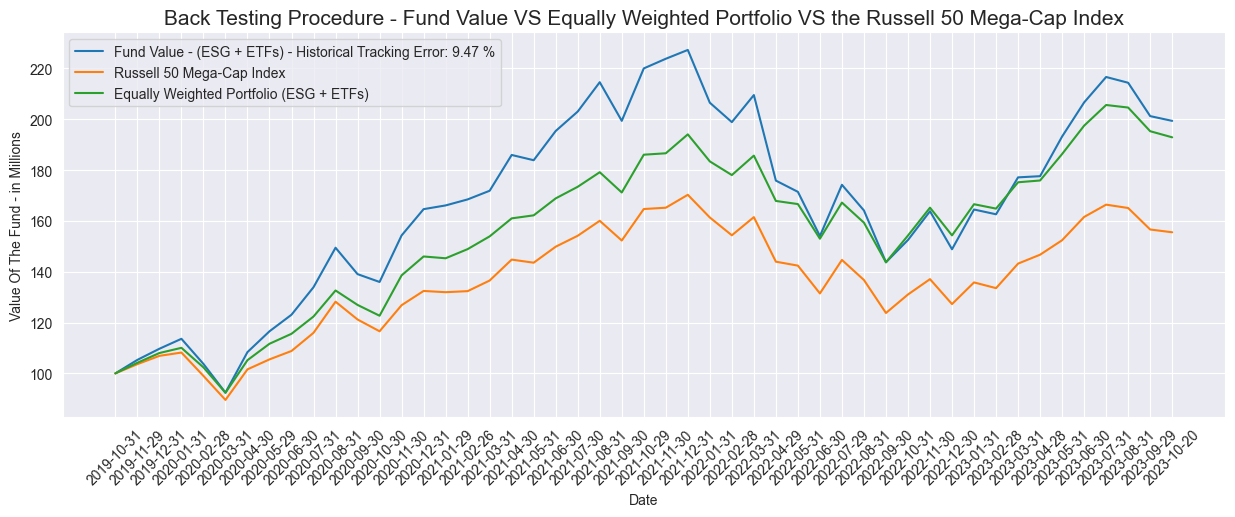

In [33]:
# selecting the tau parameter
tau = .002

# 60 % in the equity black litterman portfolio, 40 % in the ETFs
perc_equity = 0.6

# number of years of the Backtesting procedure
n_year = 4

# calling the BacktestingBl function
index, port_fund = BacktestingBlEtfs(weights_mkcap, returns, factors_rets, ru50_rets, etfs_rets,
                            new_rf, tau, number_of_views = 10, n_year = n_year, perc_equity = perc_equity)

# **Back Testing Procedure for the Equity and the Exchange Traded Branch - The overall value of the fund over 1 Year**

Length of the Back Testing Procedure: 12 Months + 20 Days
Back Testing Procedure - 1 Years - Month 12, Progress: 100.00%

+----------------------------+----------------------+---------------------+-------------------+-------------------------------+-----------------+
|        Description         | Monthly Sharpe Ratio | Annual Sharpe Ratio | Annual Return (%) | Annual Standard Deviation (%) | Number of Years |
+----------------------------+----------------------+---------------------+-------------------+-------------------------------+-----------------+
| Russell 50 Mega-Cap Index  |        0.2543        |        0.8811       |      18.6854      |            15.4171            |        1        |
|      MGS Capital Fund      |        0.3341        |        1.1572       |      30.7438      |            21.1458            |        1        |
| Equally Weighted Portfolio |        0.3396        |        1.1762       |      25.0527      |            16.1543            |        1        |
+-

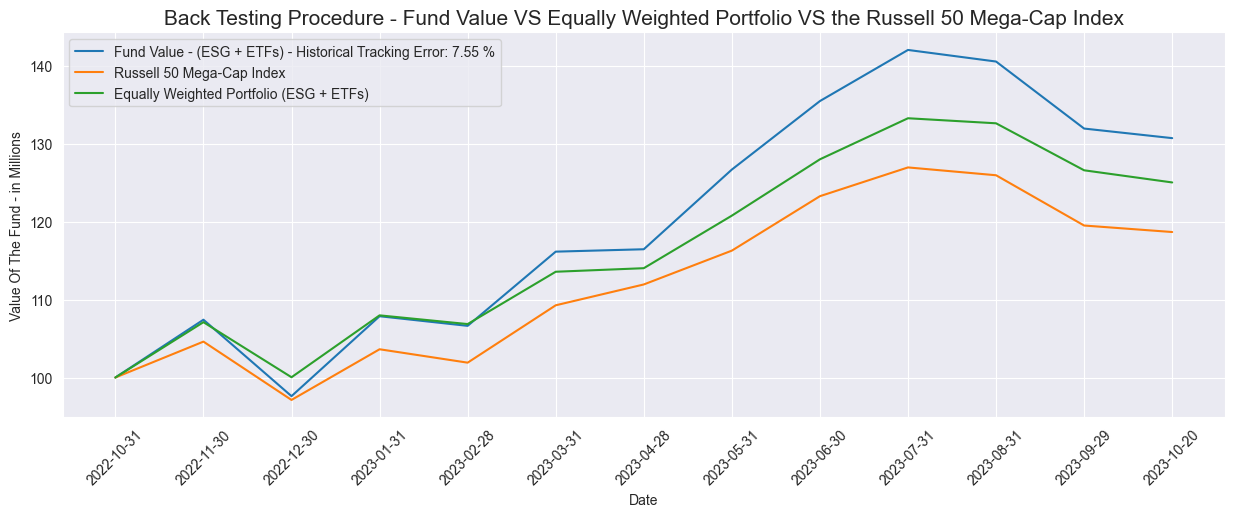

In [34]:
# selecting the tau parameter
tau = .002

# number of years of the Backtesting procedure
n_year = 4

# 60 % in the equity black litterman portfolio
perc_equity = 0.6

# calling the BacktestingBl function
PortBl = BacktestingBlEtfs(weights_mkcap, returns, factors_rets, ru50_rets, etfs_rets,
                            new_rf, tau, number_of_views = 10, n_year = 1, perc_equity = perc_equity)

# VaR and Es for the Fund + Max Drawdown (MGS Capital Fund VS Russell 50 Mega-Cap Index) - Using data for the last 4 years 

In [35]:
# number of years of the Backtesting procedure
n_year = 4

# extracting the positions of equities from the 'diff' DataFrame
equity =  list(diff["BL_Weight"].values)

# extracting the positions of ETFs from the 'etf_allocation' DataFrame
etfs = list(etf_allocation["ETF_Weight"].values)

# concatenating the weights of equities and ETFs to form the positions vector
positions = equity + etfs

# extracting the returns of stocks for the common index dates with ETF returns
stockrets = returns.loc[etfs_rets.index]

# extracting the factor names
factor_name = list(factors_rets.columns.values)

# extracting the factor returns for the common index dates with ETF returns
mappingRets = factors_rets.loc[etfs_rets.index]
mappingRets = mappingRets.iloc[-(n_year*12 +1):,:].values

# concatenating the stock and ETF returns horizontally to form the 'allReturns' matrix
allReturns = pd.concat([stockrets,etfs_rets], axis = 1)
allReturns = allReturns.iloc[-(n_year*12 +1):,:].values

In [36]:
# MAIN FUNCTION - RiskMeasures

def RiskMeasures(allReturns, mappingRets, factor_name, positions, index, port_fund, num_sims: int = 10000, alpha = 0.05):

        # calculating the variances of factors
        factor_variances = np.var(mappingRets, axis=0, ddof=1)

        # initializing an empty list to hold betas for each factor
        betas_factors = []

        # iterating through each factor to calculate betas for each stock
        for j in range(mappingRets.shape[1]):
            betas = []
            for i in range(allReturns.shape[1]):
                # computing the beta for each stock with respect to the current factor
                beta = np.cov(mappingRets[:,j],allReturns[:,i])[0,1] / factor_variances[j]
                betas.append(beta)
            betas_factors.append(betas)

        # converting the list of betas to a NumPy array for easier manipulation
        betas_factors = np.array(betas_factors).T
        idiosyncratic_variances = np.zeros(allReturns.shape[1])

        # calculating the idiosyncratic variances for each stock
        for i in range(betas_factors.shape[0]):
            # computing the residuals of each stock's returns and the fitted returns using the factor model
            residuals = allReturns[:,i] - mappingRets @ betas_factors[i,:]
            # computing the variance of the residuals
            idiosyncratic_variances[i] = np.var(residuals, ddof=1)

        # initializing a zero matrix to store the variance-covariance matrix
        variance_covariance_matrix = np.zeros((allReturns.shape[1], allReturns.shape[1]))

        # computing the variance-covariance matrix using the formula for a factor model
        for i in range(mappingRets.shape[1]):
            # summing the outer product of the betas for each factor times the variance of the factor
            variance_covariance_matrix = variance_covariance_matrix + np.outer(betas_factors[:,i],betas_factors[:,i]) * factor_variances[i]

        # adding the idiosyncratic variances to the diagonal of the variance-covariance matrix
        variance_covariance_matrix += np.diagflat(idiosyncratic_variances)

        # performing Cholesky decomposition to obtain the lower triangular matrix for later simulations
        cholesky_matrix = np.linalg.cholesky(variance_covariance_matrix)

        def run_simulation(simulation):
            # generating standard normal random numbers
            random_numbers = norm.ppf(np.random.rand(allReturns.shape[0], len(positions)))

            # multiplying the Cholesky matrix with the random numbers to obtain correlated random numbers
            simulated_returns = pd.DataFrame(np.matmul(cholesky_matrix, random_numbers.T).T)

            # computing the Profit & Loss by multiplying the simulated returns with the positions
            PL = simulated_returns @ np.transpose(positions)

            # computing the Value at Risk (VaR) at the specified confidence level (alpha)
            VaR = - np.quantile(PL, alpha)
            # computing the Expected Shortfall (ES) for losses exceeding the VaR
            ES = - np.mean(PL[PL < - VaR])

            # returning the VaR, ES, and simulated returns for this simulation
            return VaR, ES, simulated_returns.values

        # initializing arrays to store the simulated returns, Value at Risk and Expected Shortfall for each simulation
        simulated_returns_3D = np.zeros((allReturns.shape[0], len(positions), num_sims))
        MC_VARS = np.zeros(num_sims) ; MC_ES = np.zeros(num_sims)

        # performing Monte Carlo simulations in parallel to improve computational efficiency
        results = Parallel(n_jobs=-1)(delayed(run_simulation)(simulation) for simulation in range(num_sims))

        # iterating through the results to store the VaR, ES, and simulated returns for each simulation
        for i, (VaR, ES, simulated_returns) in enumerate(results):
            MC_VARS[i] = VaR
            MC_ES[i] = ES
            simulated_returns_3D[:,:,i] = simulated_returns

        # computing the mean Value at Risk and Expected Shortfall across all simulations
        VaR = np.mean(MC_VARS) ; ES = np.mean(MC_ES) ; VaR = max(VaR,0) ; ES = max(ES,0)

        def calculate_max_drawdown(values):
            # Ensure values are a numpy array for vectorized operations
            values = np.array(values)
            
            # Find the index of the peaks (where the value is higher than the surrounding values)
            peak_indices = np.where((values[:-1] > values[1:]))[0]
            
            # Initialize the maximum drawdown to 0
            max_drawdown = 0
            
            # Loop through each peak
            for peak_index in peak_indices:
                # Find the minimum value after the peak (the trough)
                trough_value = np.min(values[peak_index:])
                
                # Calculate the drawdown
                drawdown = (values[peak_index] - trough_value) / values[peak_index]
                
                # Update the maximum drawdown if this drawdown is larger
                max_drawdown = max(max_drawdown, drawdown)
            
            return max_drawdown * 100  # Return as percentage
        
        fund_max_drawdown = calculate_max_drawdown(port_fund)
        index__max_drawdown = calculate_max_drawdown(index)
        
        # creating a dictionary to store results and additional information
        results_dict = {
            'VaR': round(VaR,2),
            'Es': round(ES,2),
            'ConfLevel':(1-alpha),
            'Period':"1 Month",
            'Method':"Factor Model - Monte Carlo",
            'NumSims':num_sims,
            'Factors':factor_name,
            'FundMaxDrawdown %':round(fund_max_drawdown,2),
            'IndexMaxDrawdown %':round(index__max_drawdown,2)}
        
        return results_dict

In [37]:
RiskMeasures(allReturns, mappingRets, factor_name, positions, index, port_fund, num_sims =  50000, alpha = 0.05)

{'VaR': 11806063.49,
 'Es': 14465195.75,
 'ConfLevel': 0.95,
 'Period': '1 Month',
 'Method': 'Factor Model - Monte Carlo',
 'NumSims': 50000,
 'Factors': ['MARKET', 'VALUE', 'SIZE', 'VOLATILITY', 'GROWTH', 'MOMENTUM'],
 'FundMaxDrawdown %': 36.76,
 'IndexMaxDrawdown %': 27.32}